In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 111)
pd.set_option('display.max_columns', 111)

In [3]:
data = pd.read_excel("../data/cov-data.xlsx")

In [4]:
print(data.shape)
data.head()

(5644, 111)


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# 1. EDA (Exploratory Data Analysis)

## Objectif:
- Understanding our data as well as possible
- Develop an initial strategy

## Basic Checklist:

### Shape Analysis:
- **independent variable:** SARS-Cov-2 exam result
- **Rows and Columns:** 5644, 111
- **Types of variables:** numerical: 74, categorial: 37
- **Missing Values analysis:**
    - A lof of NaN (half of variables > 90% Nan)
    - 2 groups:
        - Viral testing -> 76%
        - Bloods Rate -> 89%

### Analysis:
- **Target Visualization:**
    - negative (0): 0.901
    - positive (1): 0.098

- **Signification Variables:**
     - Numerical variables: standardize, skewed, Blood rate
     - *Patient age quantile* hard to understand, data already processed.
     - Categorical variables: Binary (0 or 1), viral, Rhinovirus/Enterovirus very high
- **Relationship between Variables and Target:**
     - target / blood: Monocytes, Platetes, Leukocytes rates may be link to the cov-19
     - target / age: everyone can get cov-19 none correlation between age and cov-19
     - target / viral: Very rare to get 2 diseases in a same time. None link with cov-19

### Deep Analysis:
- **Variables / Variables Relationship:**
    - blood_data / blood_data: some variables are related (correlate): +0.9
    - blood_data / age: weak correlation
    - viral / viral: Rapid test are not efficient.
    - disease / blood_data:
    - hospitalization / is_sick:
    - hospitalization / blood:

- **NaN Analysis**: Without NaN
     - viral: 1350 variables left, target=(92% negative, 8% positive)
     - blood: 600 variables left, target=(87% negative, 13% positive)
     - both: 99 variables left, target=(86% negative, 14% positive)

## Hypotheses nulle (H0):
- Individuals with covid-19 have significantly different rates of Leukocytes, Monocytes, Platelets
    - H0 = Average rates are EQUAL in positive and negative individuals -> REJECTED
    
- Individuals with any disease have significantly different rates.


## Shape Analysis

In [5]:
df = data.copy()

In [6]:
df.shape

(5644, 111)

In [7]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

<AxesSubplot:>

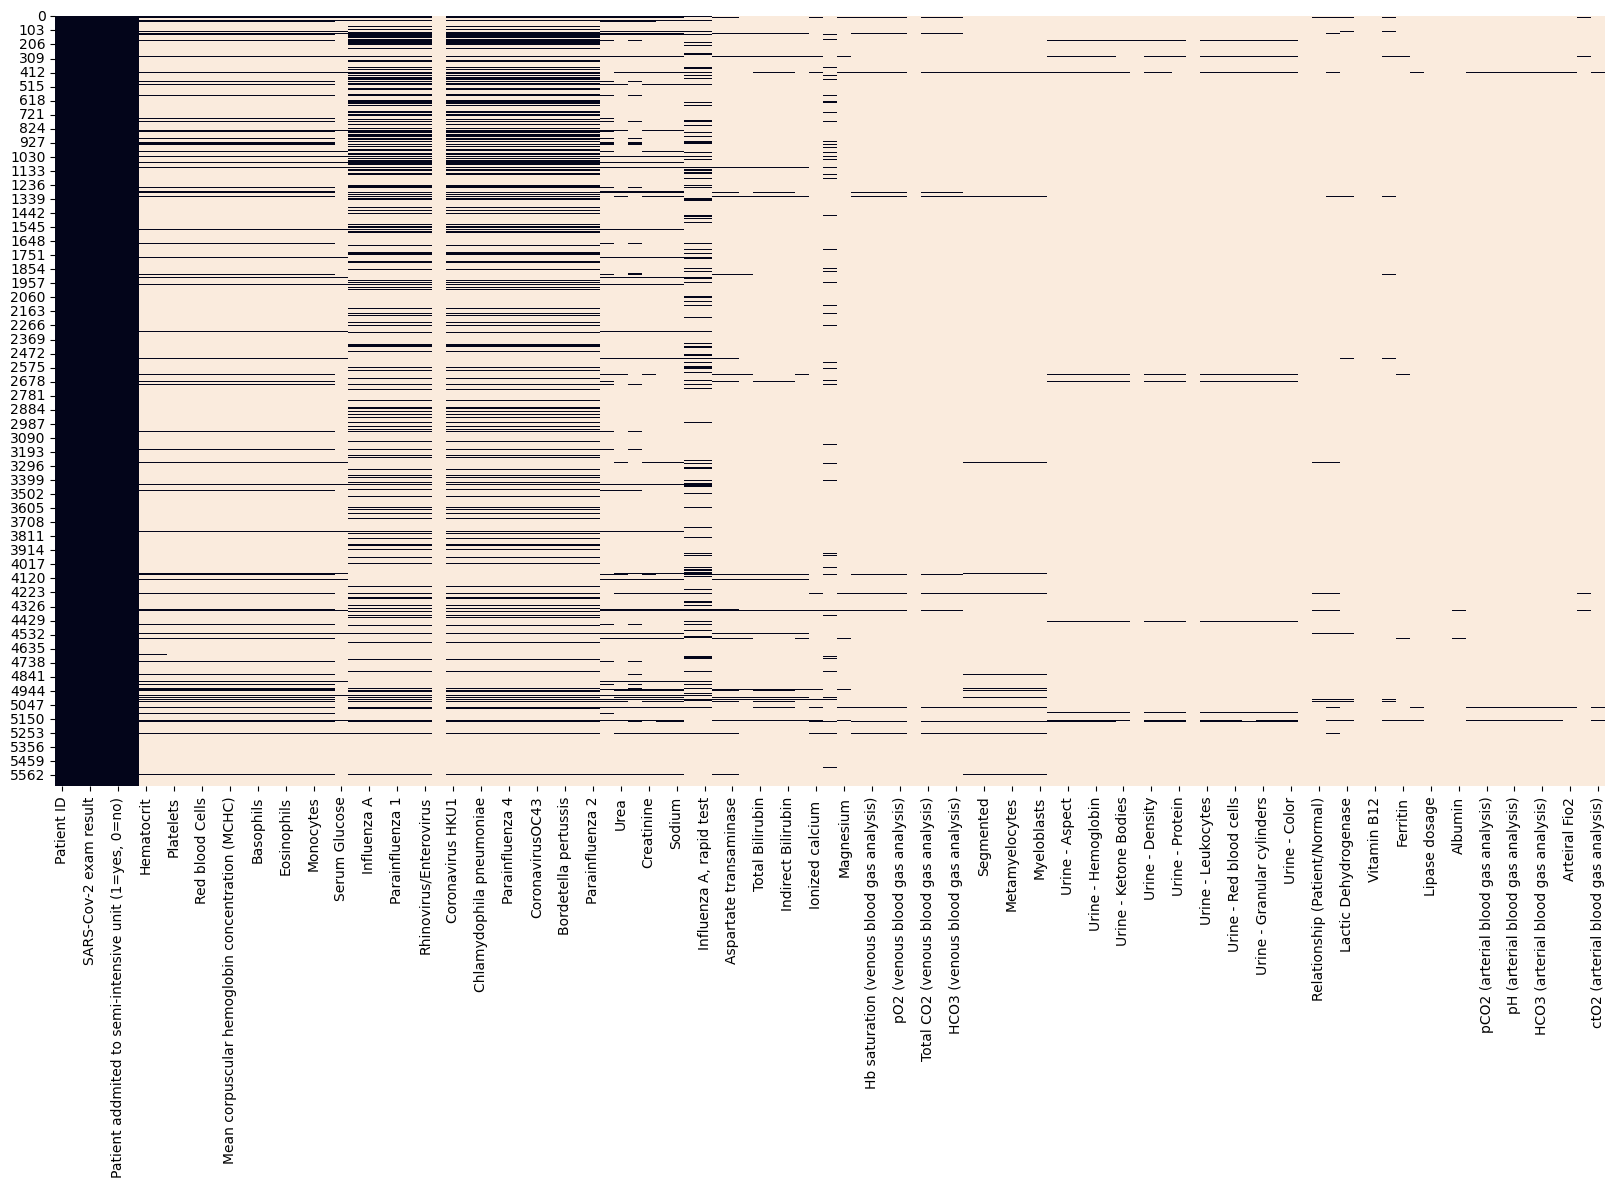

In [8]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar=False)

In [9]:
missing_rate = df.isna().sum()/df.shape[0]
missing_rate.sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

## Analysis

### Elimination of Unnecessary Columns

In [10]:
df = df[df.columns[missing_rate < 0.90]]

In [11]:
print(df.shape)
df.head()

(5644, 39)


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN


<AxesSubplot:>

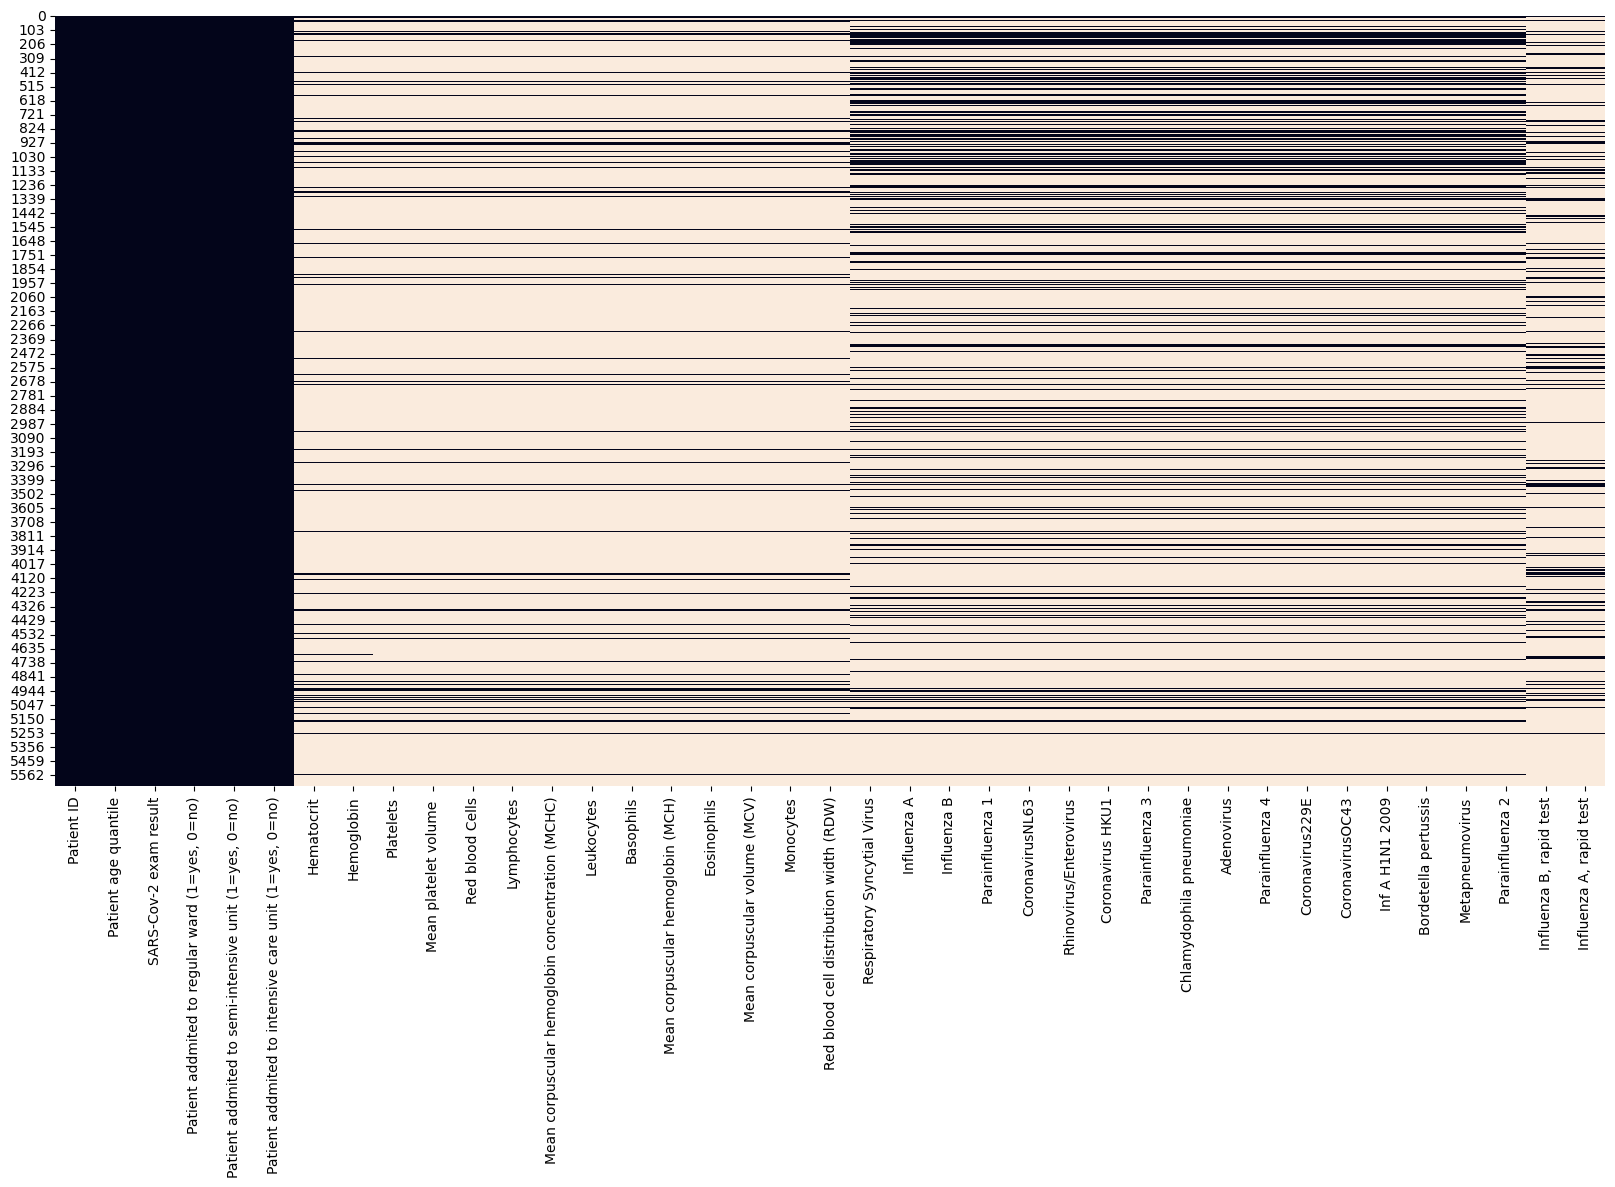

In [12]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar=False)

In [13]:
dataset = df.drop('Patient ID', axis=1)

### Target Visualization

In [14]:
dataset['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

### Numerical Variables Visualization

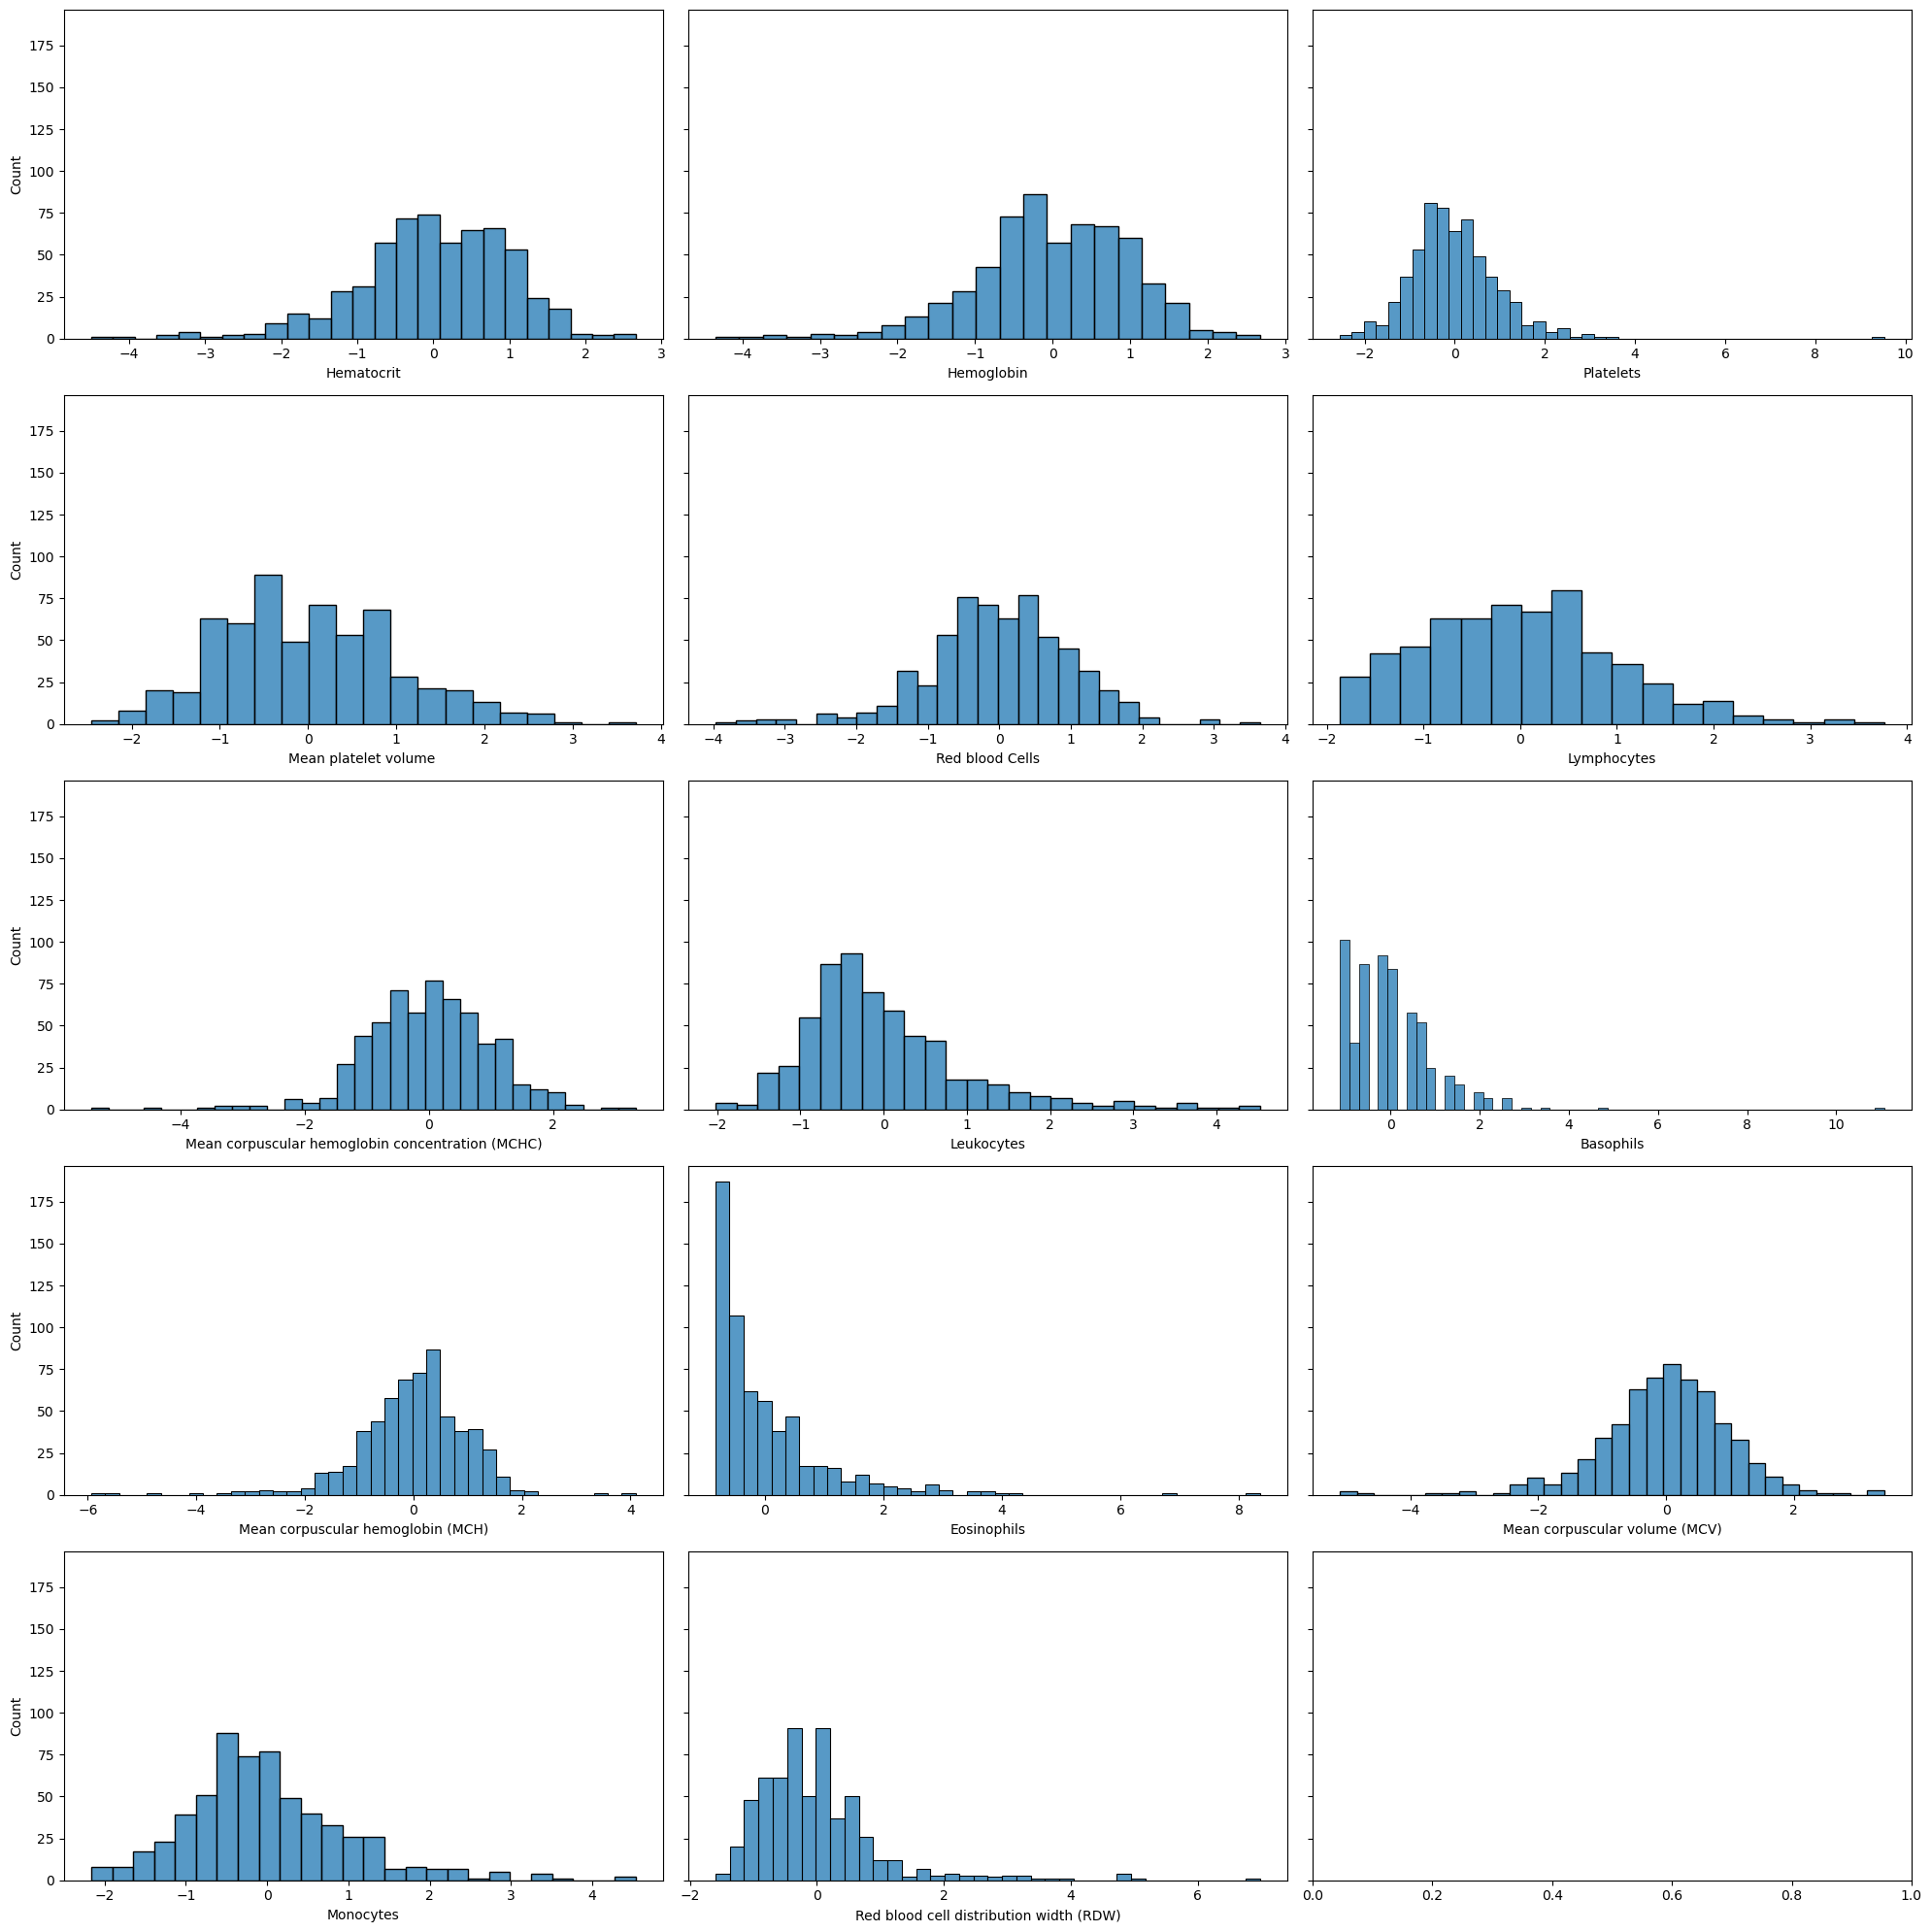

In [15]:
fig, axes = plt.subplots(5, 3, figsize=(20, 20), sharey=True)
i, j = 0, 0
for col in dataset.select_dtypes('float'):
    sns.histplot(ax=axes[i, j], data=dataset[col])
    axes[i, j].set_xlabel(col)
    j += 1
    if j > 2:
        j = 0
        i += 1
fig.tight_layout()
plt.show()

<AxesSubplot:xlabel='Patient age quantile', ylabel='Count'>

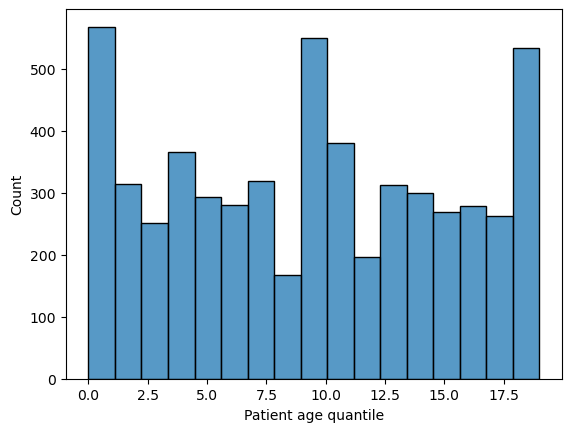

In [16]:
sns.histplot(dataset['Patient age quantile'])

In [17]:
dataset['Patient age quantile'].value_counts()

11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64

### Categorial Variables Visualization

In [18]:
for col in dataset.select_dtypes('object'):
    print(f'{col :-<30} {dataset[col].unique()}')

SARS-Cov-2 exam result-------- ['negative' 'positive']
Respiratory Syncytial Virus--- [nan 'not_detected' 'detected']
Influenza A------------------- [nan 'not_detected' 'detected']
Influenza B------------------- [nan 'not_detected' 'detected']
Parainfluenza 1--------------- [nan 'not_detected' 'detected']
CoronavirusNL63--------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus-------- [nan 'detected' 'not_detected']
Coronavirus HKU1-------------- [nan 'not_detected' 'detected']
Parainfluenza 3--------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae------ [nan 'not_detected' 'detected']
Adenovirus-------------------- [nan 'not_detected' 'detected']
Parainfluenza 4--------------- [nan 'not_detected' 'detected']
Coronavirus229E--------------- [nan 'not_detected' 'detected']
CoronavirusOC43--------------- [nan 'not_detected' 'detected']
Inf A H1N1 2009--------------- [nan 'not_detected' 'detected']
Bordetella pertussis---------- [nan 'not_detected' 'detected']


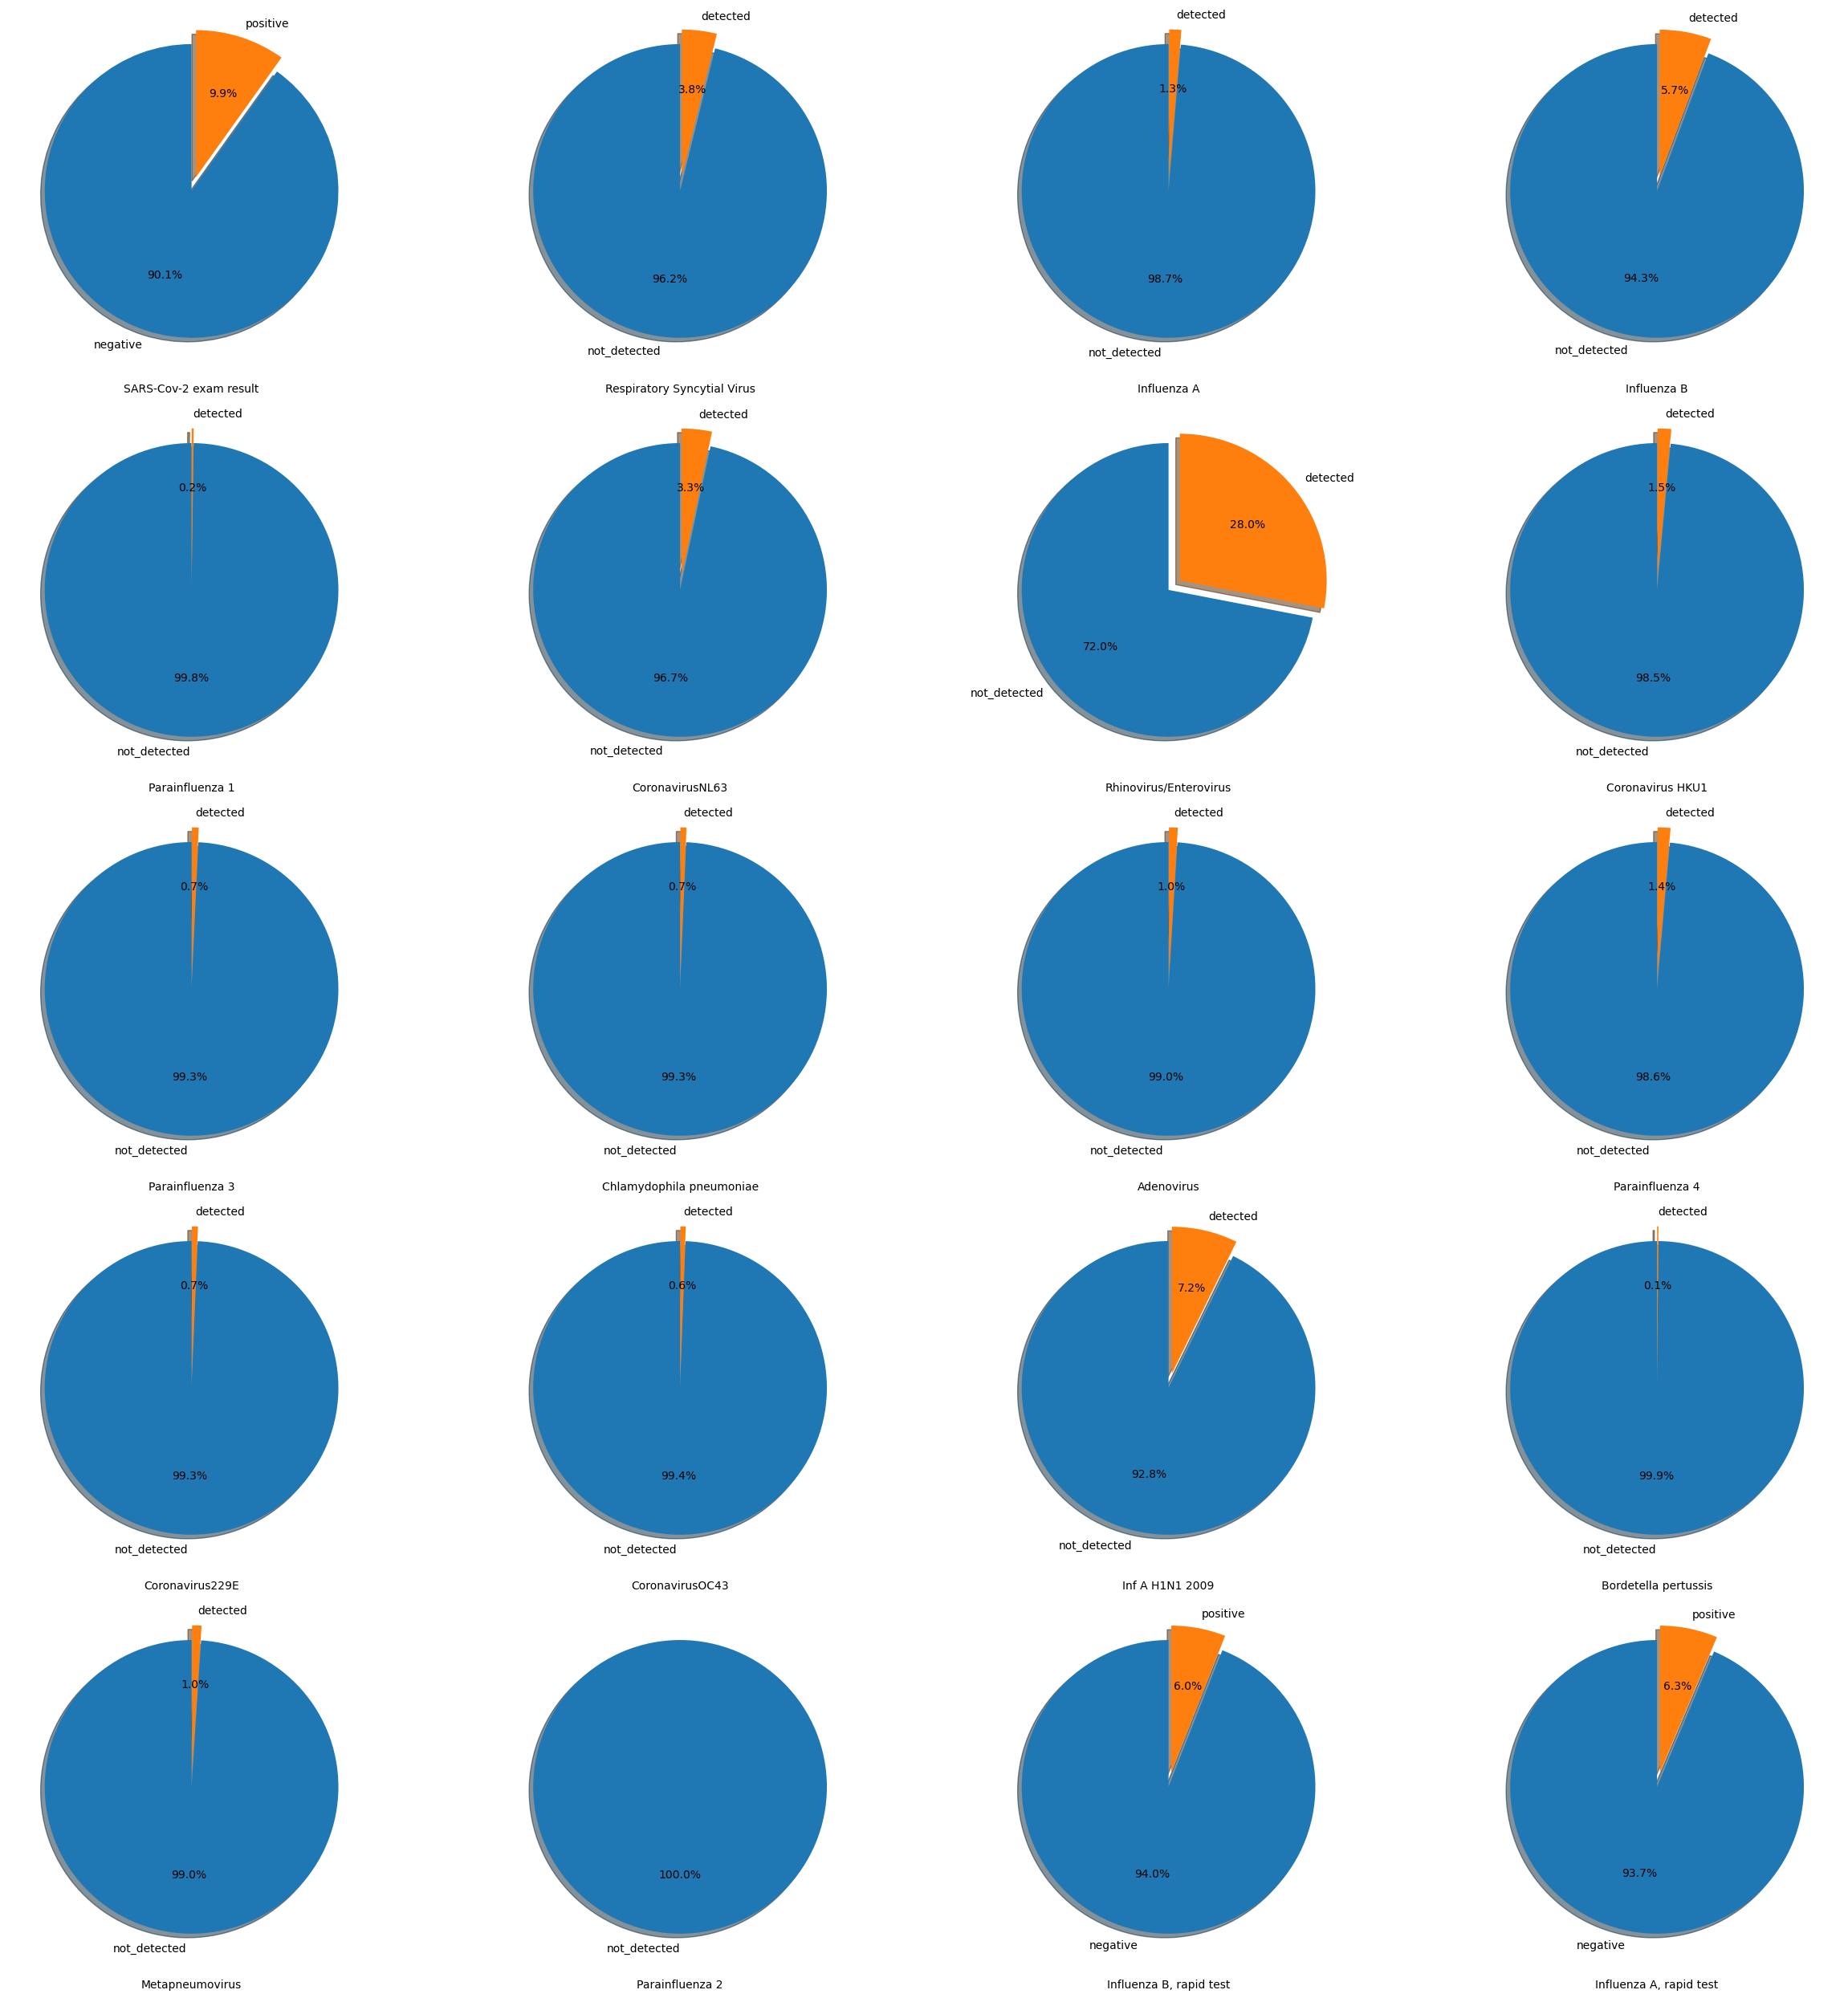

In [19]:
fig, axes = plt.subplots(5, 4, figsize=(25, 25))
i, j = 0, 0
for col in dataset.select_dtypes('object'):
    explode = (0,)
    d = dataset[col].value_counts(normalize=True)
    if len(d.index) > 1:
        explode = (0, 0.1)
    axes[i, j].pie(d, explode=explode, labels=d.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
    axes[i, j].set_xlabel(col)
    j += 1
    if j > 3:
        j = 0
        i += 1
fig.tight_layout()
plt.show()

## Relationship Target / Variables

### Positive and Negative

In [20]:
positive_df = dataset[dataset['SARS-Cov-2 exam result'] == 'positive']
negative_df = dataset[dataset['SARS-Cov-2 exam result'] == 'negative']

### Blood / Viral

In [21]:
missing_rate = df.isna().sum()/df.shape[0]

In [22]:
blood_cols = df.columns[(missing_rate < 0.90) & (missing_rate > 0.88)]
viral_cols = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

### Target / Blood

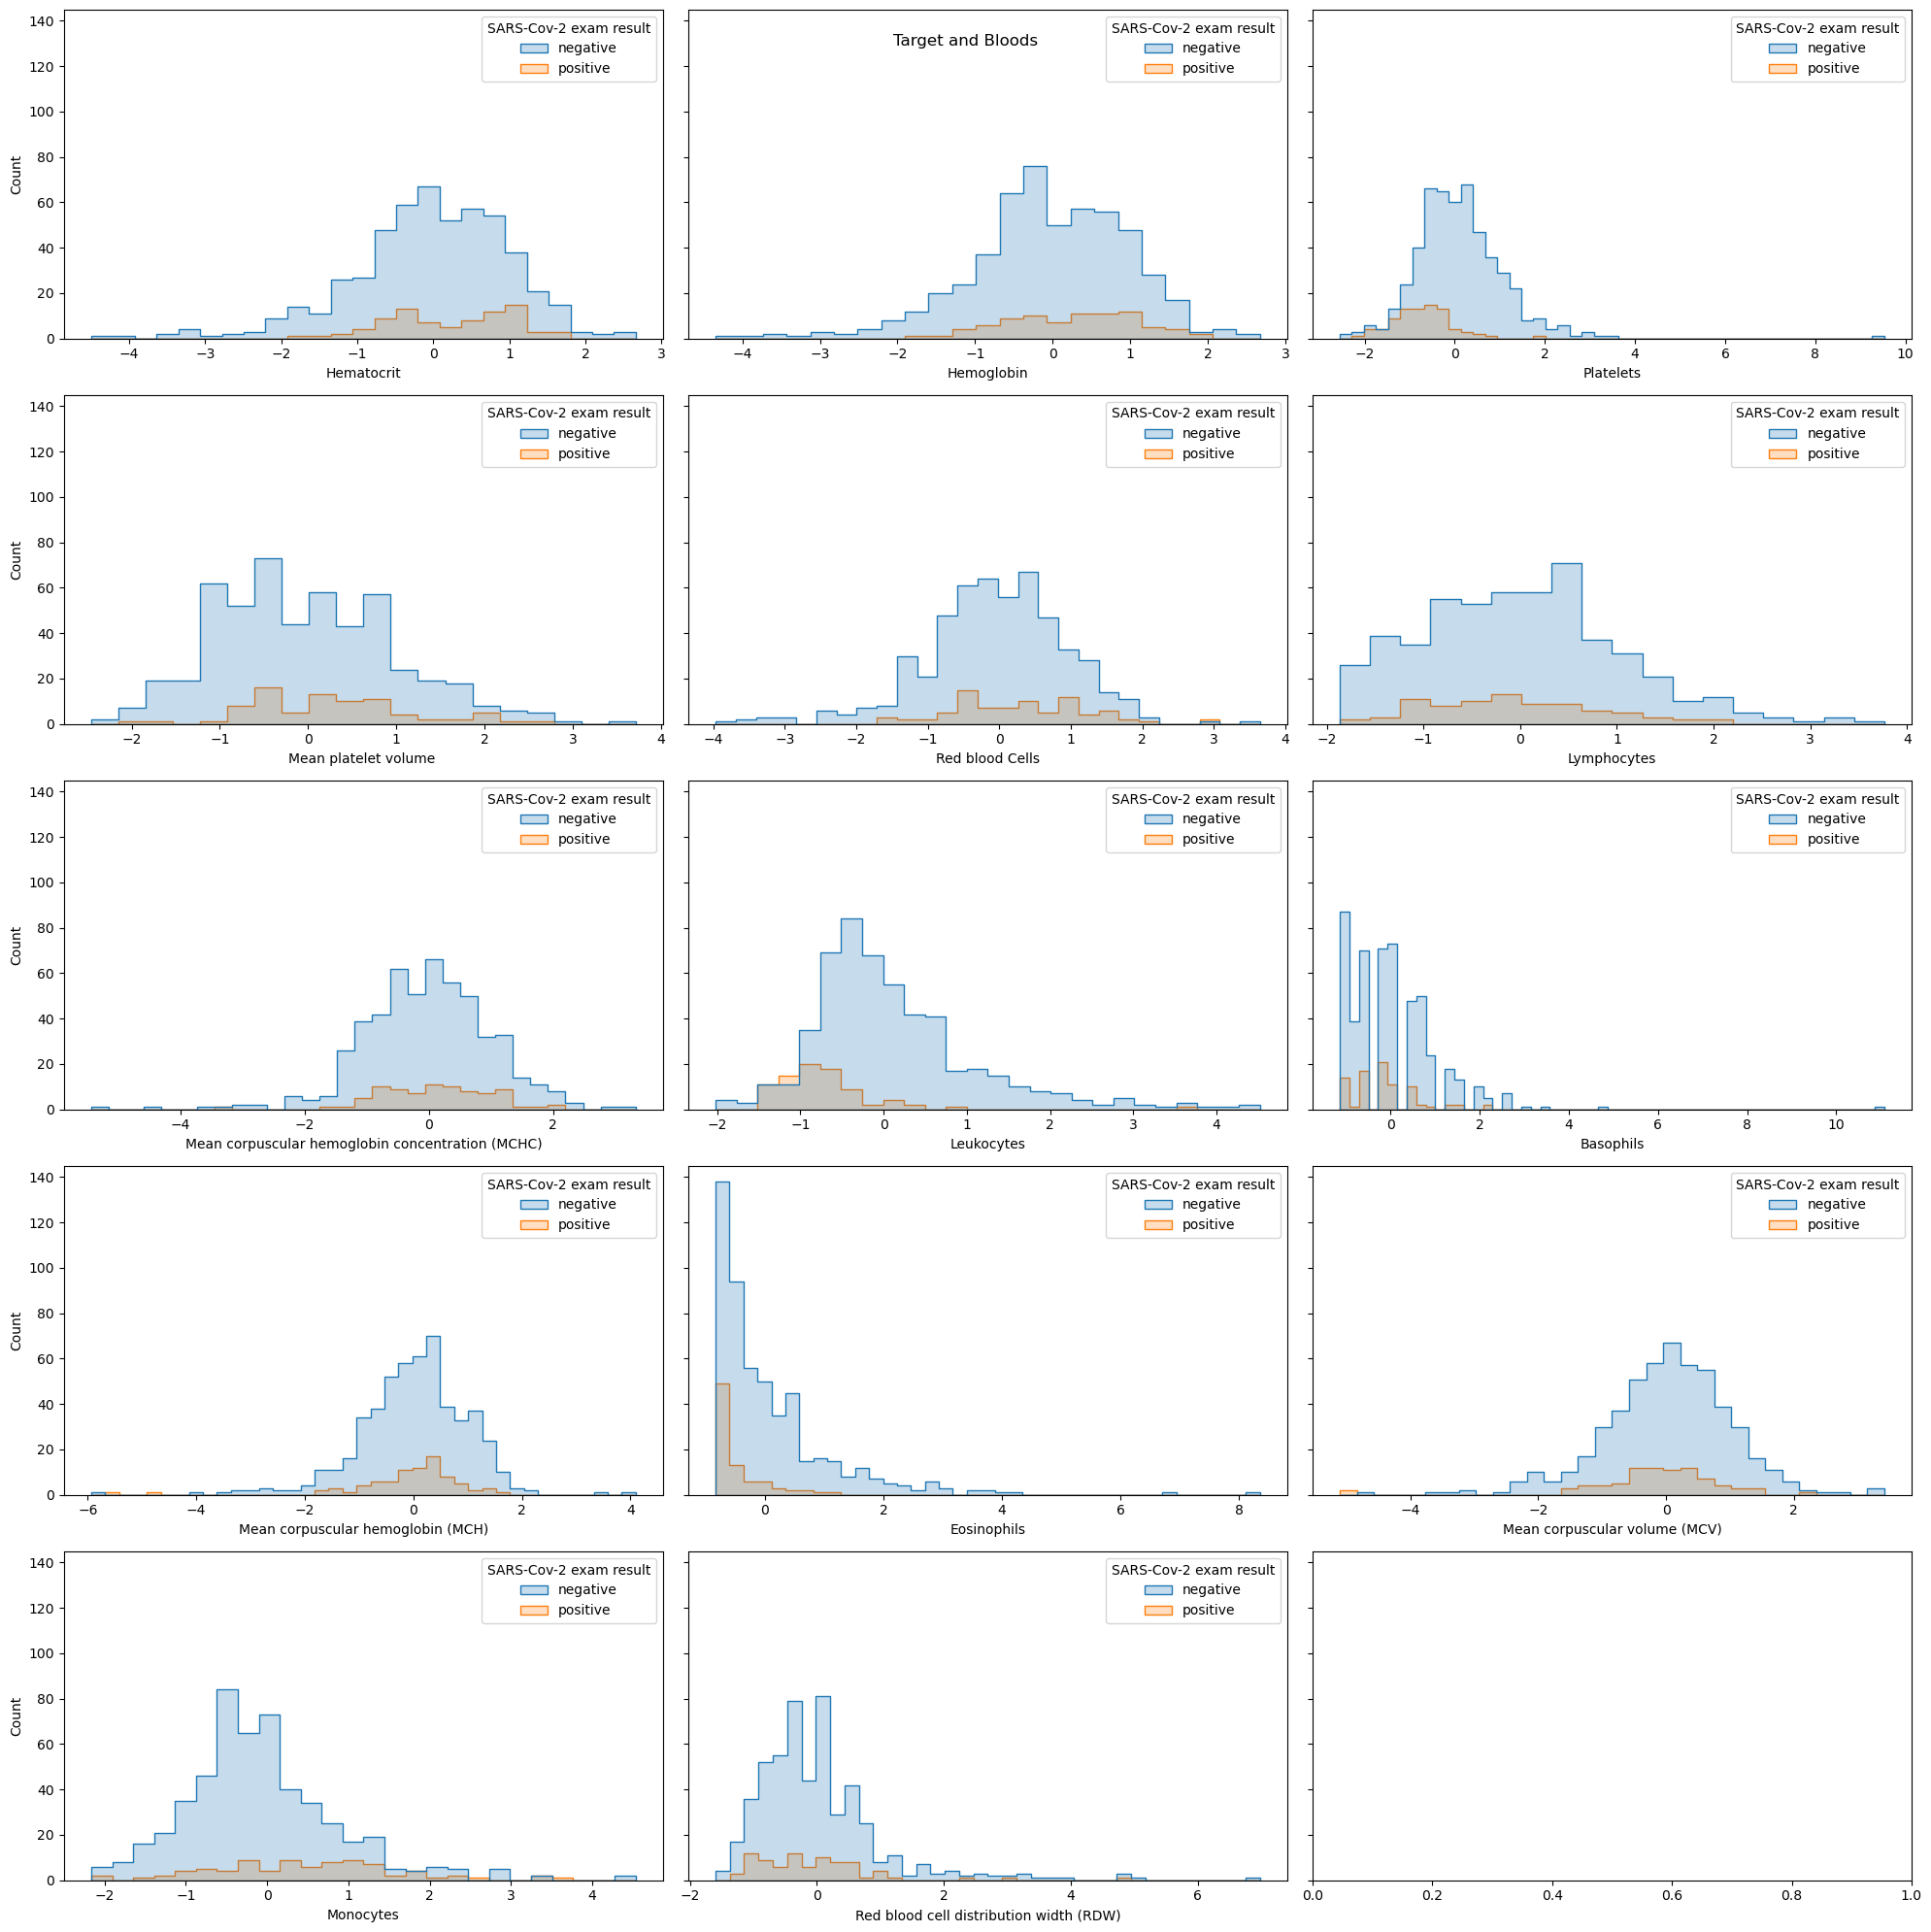

In [23]:
fig, axes = plt.subplots(5, 3, figsize=(20, 20), sharey=True)
i, j = 0, 0
for col in blood_cols:
    sns.histplot(
        ax=axes[i, j],
        data=dataset[['SARS-Cov-2 exam result', col]],
        x=col,
        hue='SARS-Cov-2 exam result',
        element="step"
    )
    axes[i, j].set_xlabel(col)
    j += 1
    if j > 2:
        j = 0
        i += 1
fig.tight_layout()
fig.suptitle("Target and Bloods")
plt.show()

### Relationship Target / Age

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

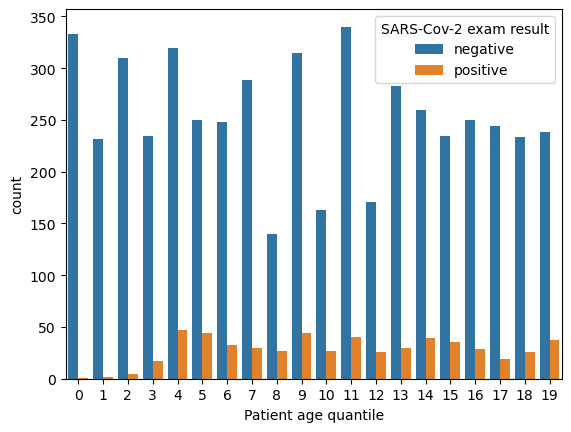

In [24]:
sns.countplot(data=dataset, x='Patient age quantile', hue='SARS-Cov-2 exam result')

### Relationship Target / Viral

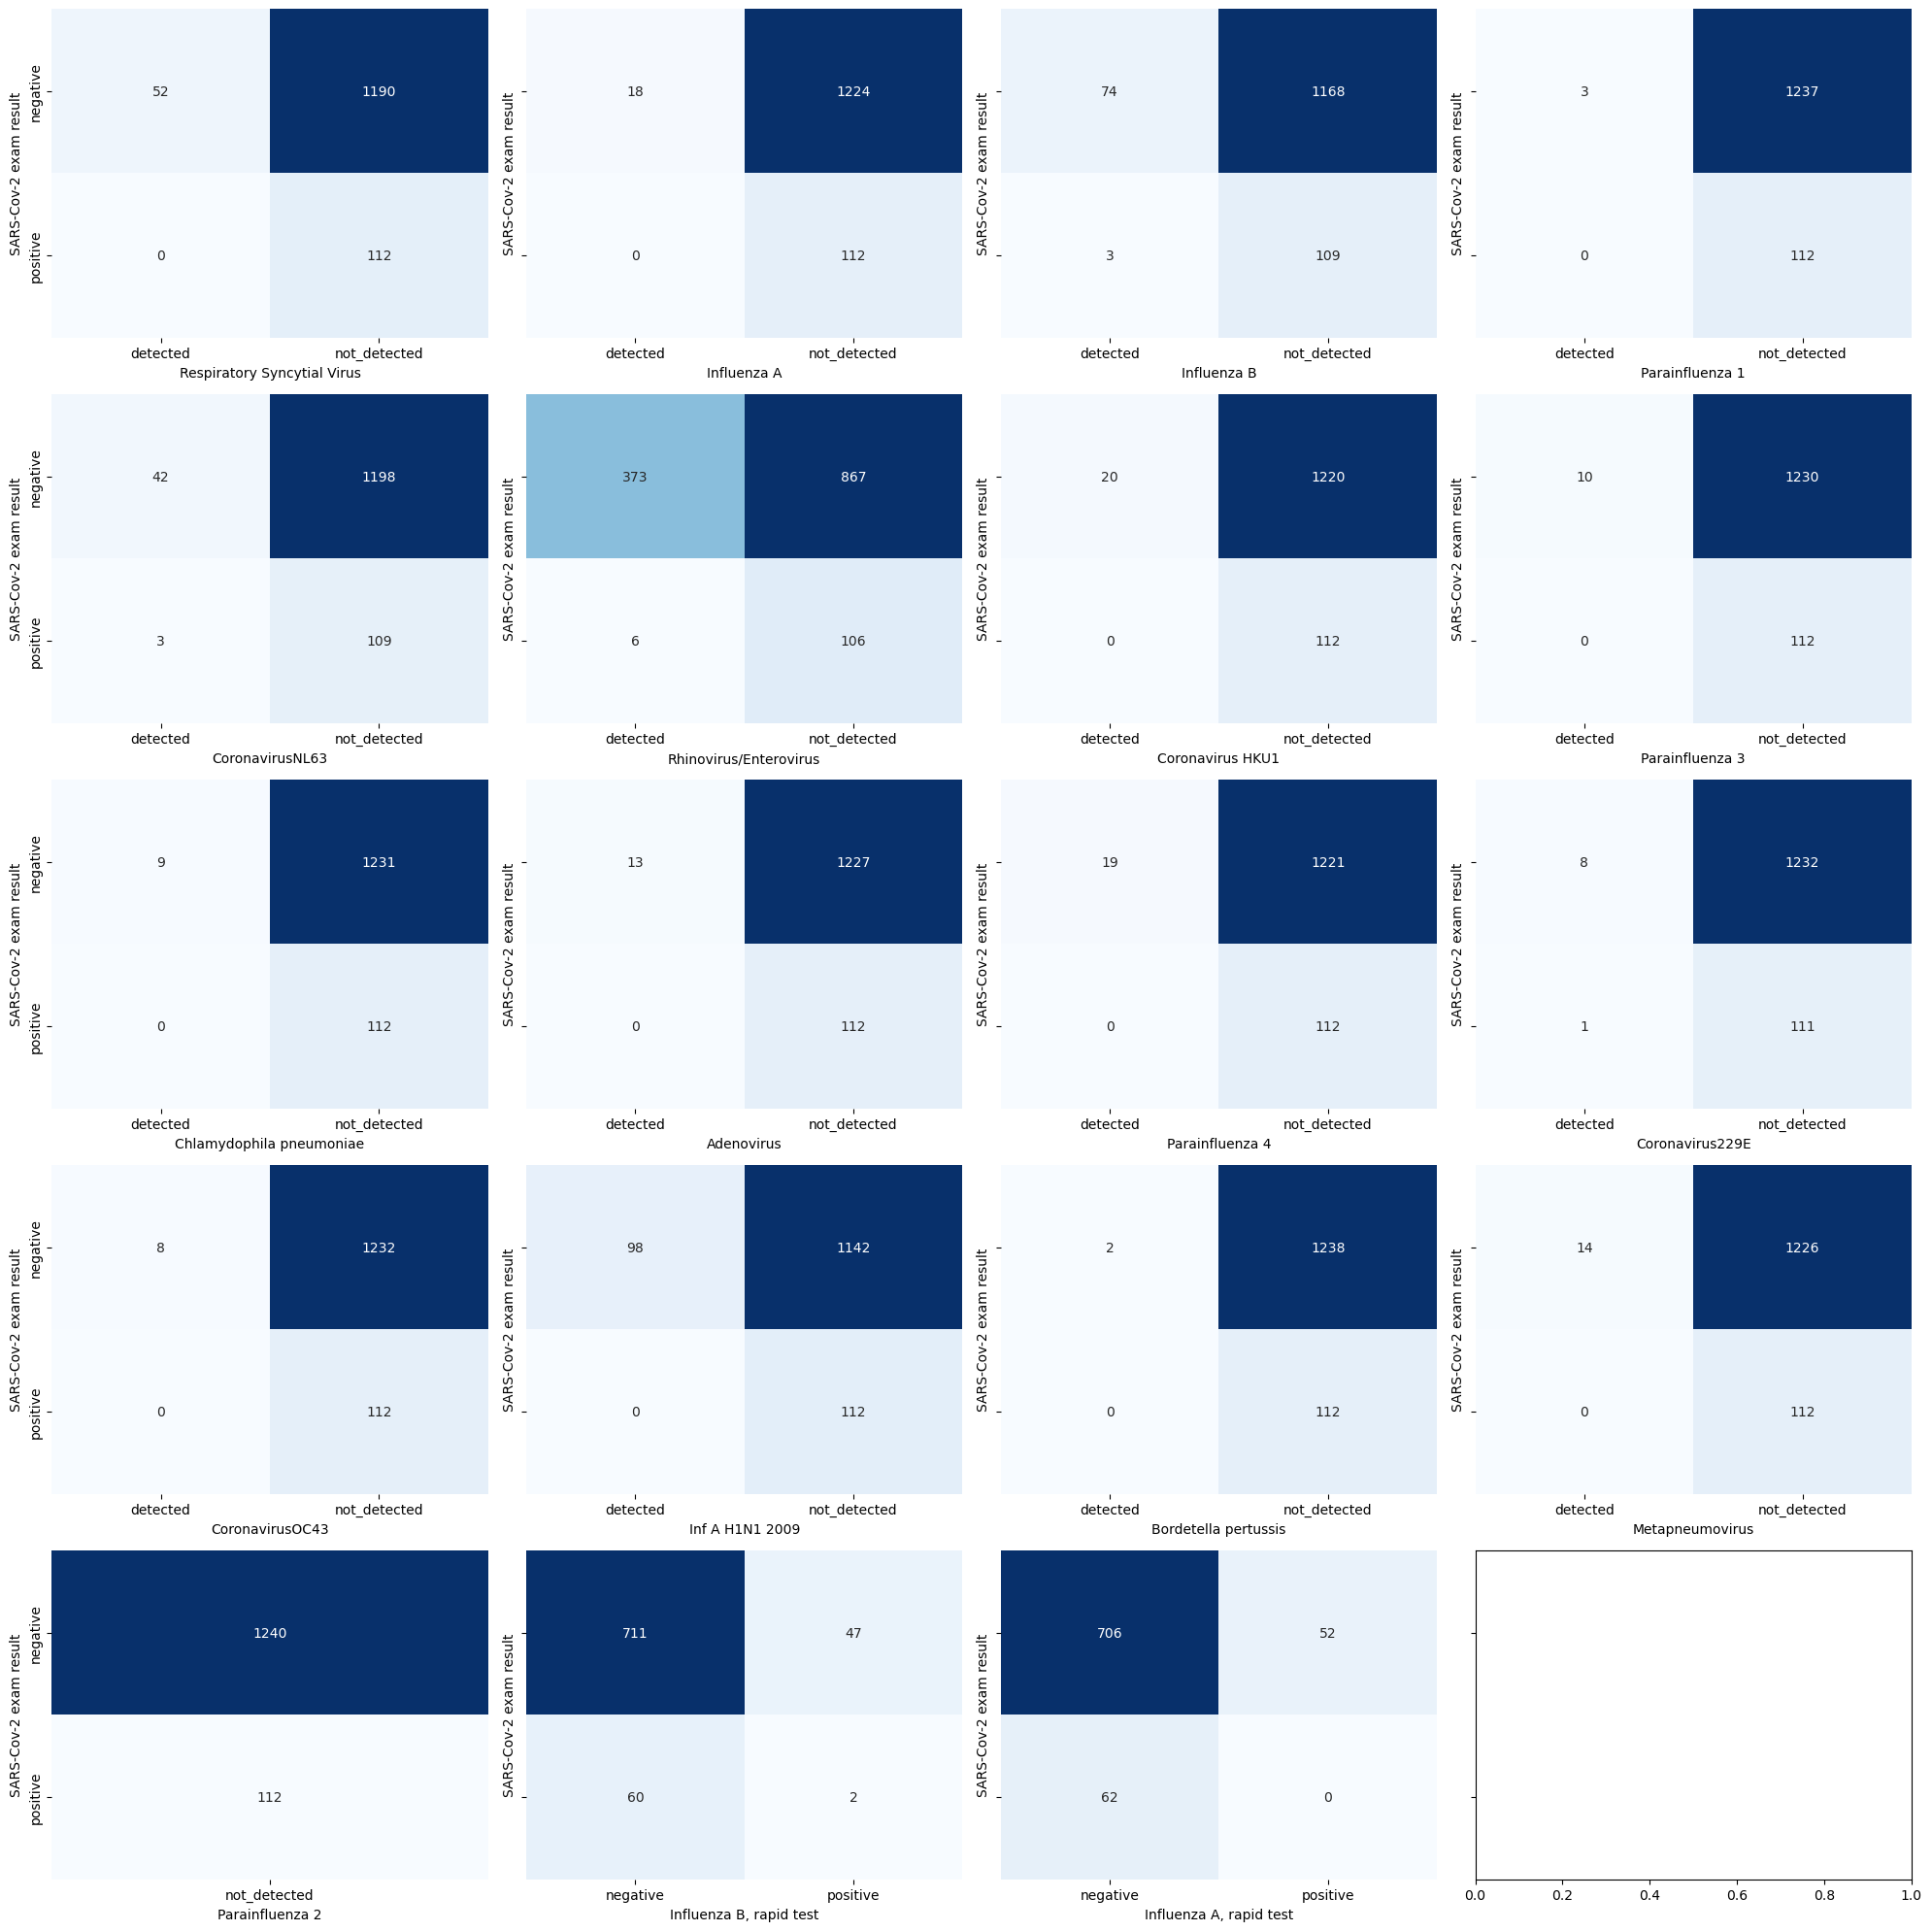

In [25]:
fig, axes = plt.subplots(5, 4, figsize=(20, 20), sharey=True)
i, j = 0, 0
for col in viral_cols:
    sns.heatmap(
        ax=axes[i, j],
        data=pd.crosstab(dataset['SARS-Cov-2 exam result'], dataset[col]),
        annot=True,
        fmt='d',
        cbar=False,
        cmap='Blues'
    )
    axes[i, j].set_xlabel(col)
    j += 1
    if j > 3:
        j = 0
        i += 1
fig.tight_layout()
plt.show()

## Deep Analysis

### Variables / Variables Relationship

### Blood Rate Relationship

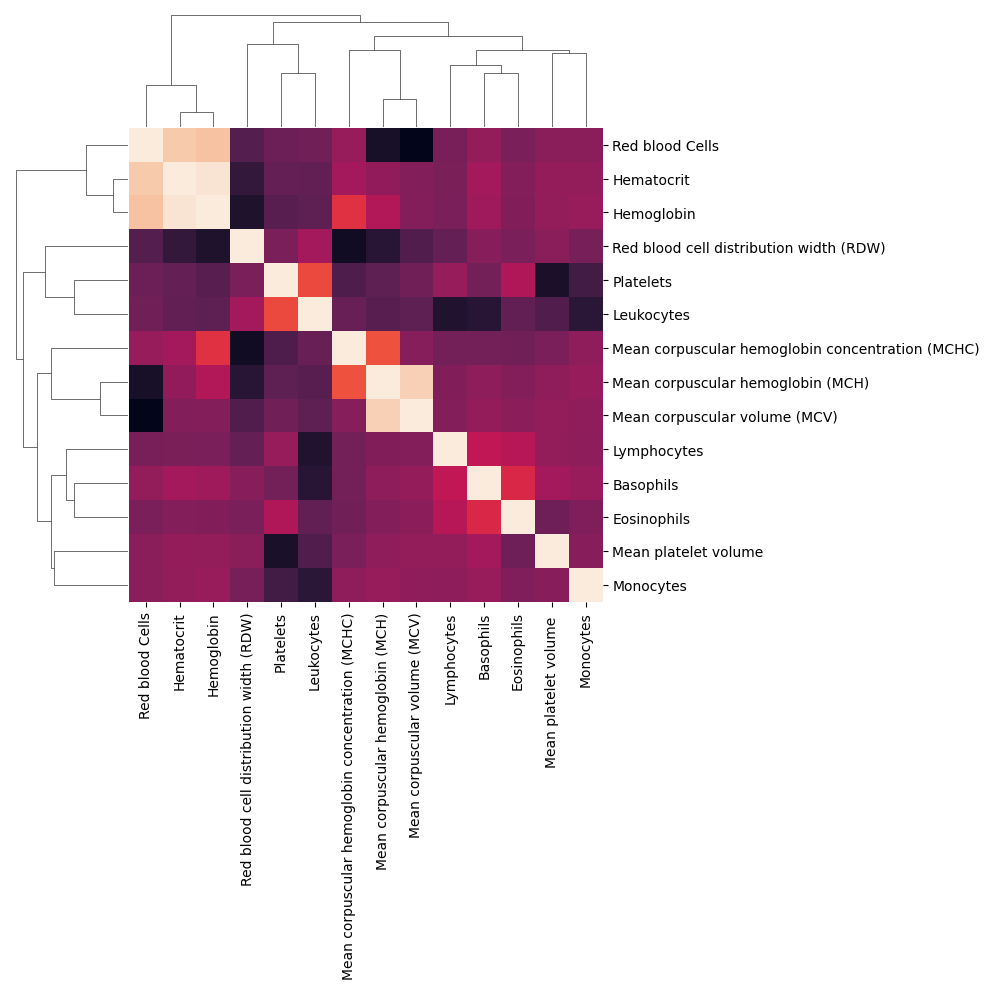

In [26]:
sns.clustermap(dataset[blood_cols].corr(), cbar_pos=None)

### Age / Blood Relationship

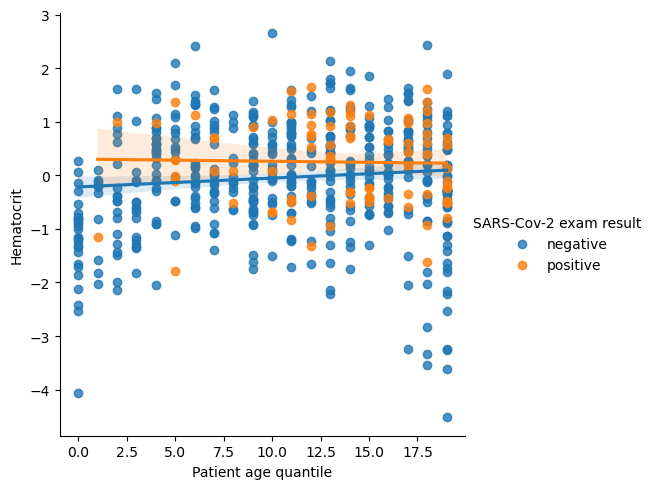

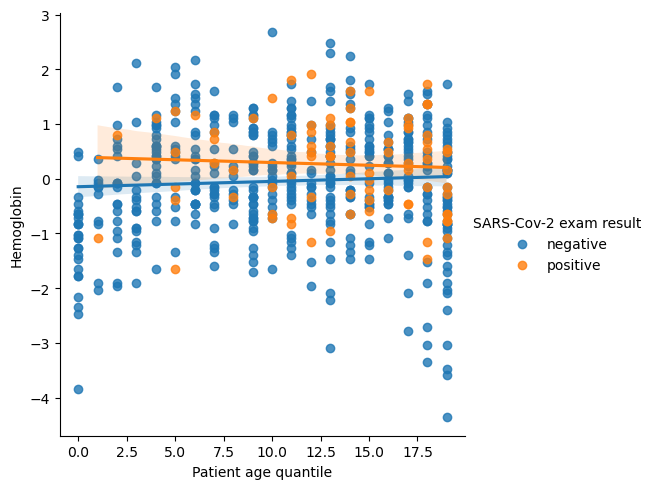

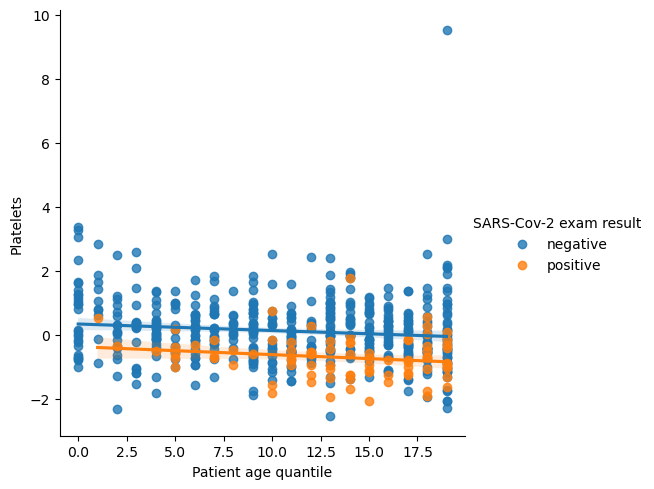

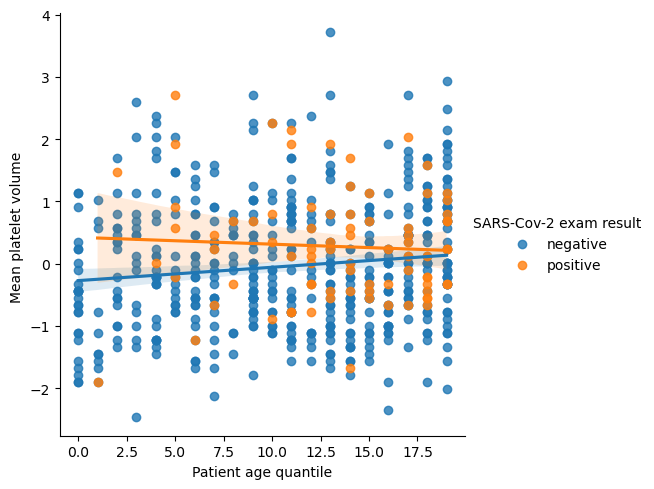

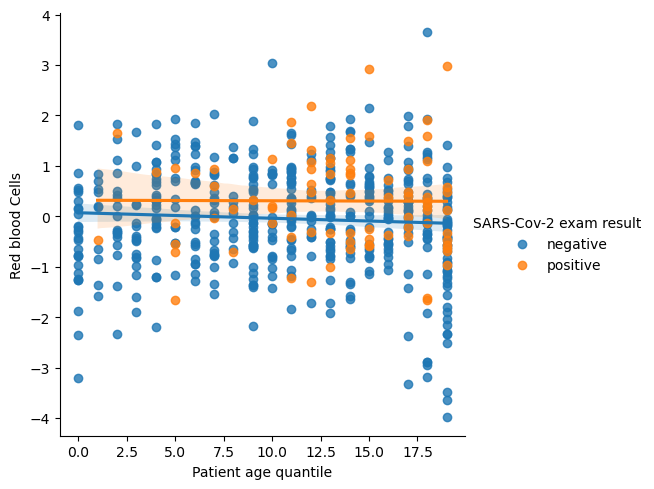

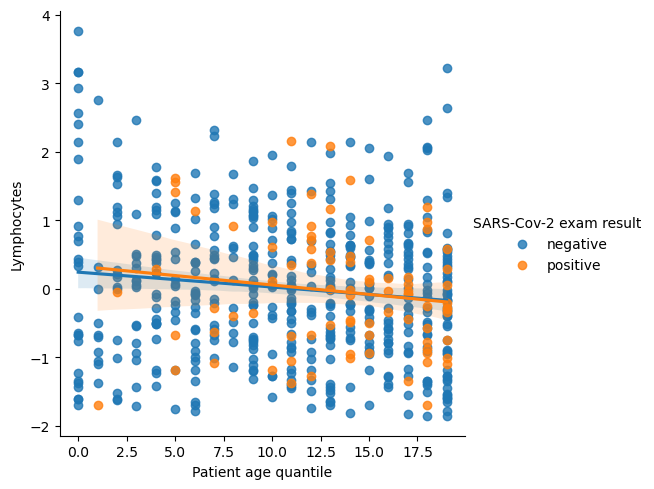

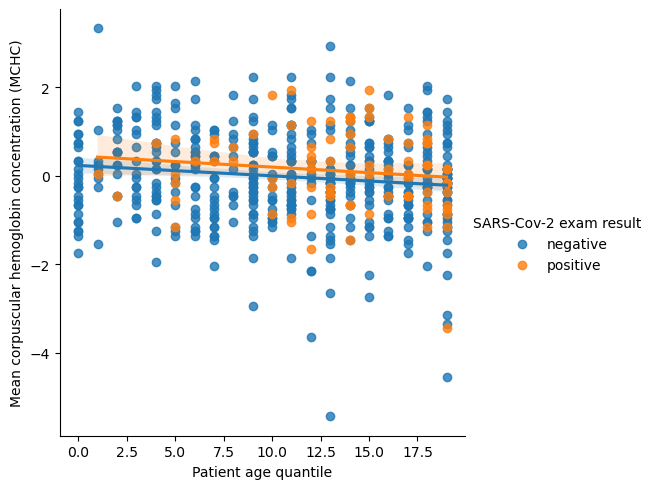

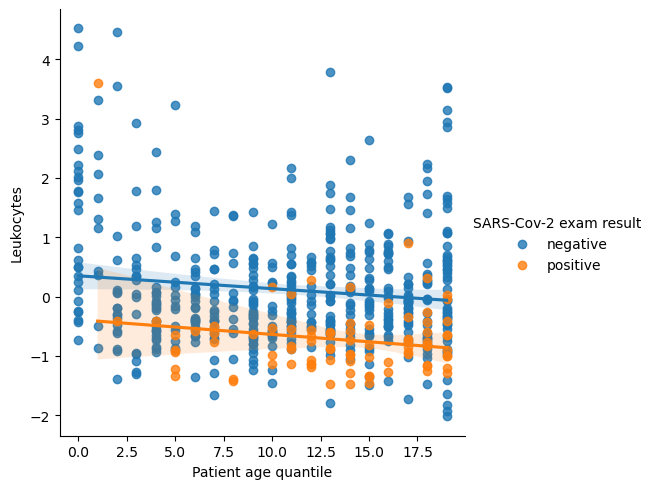

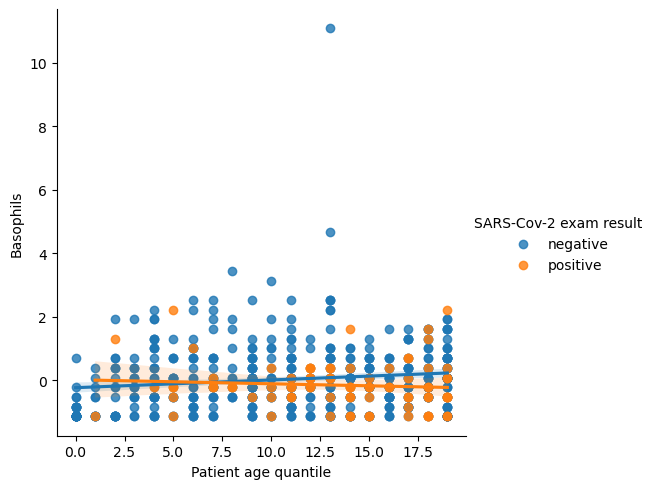

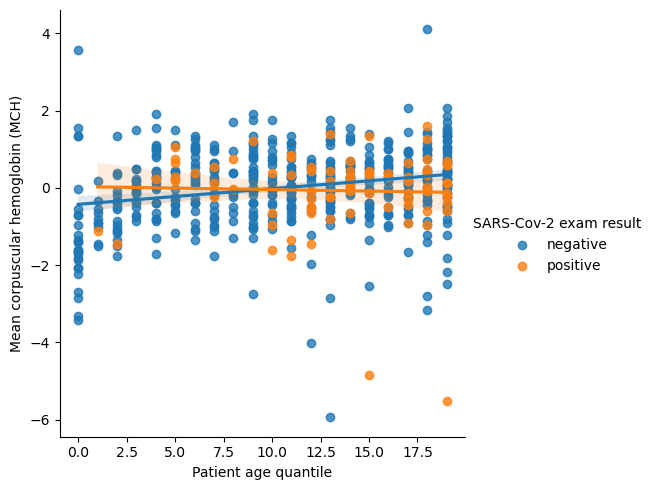

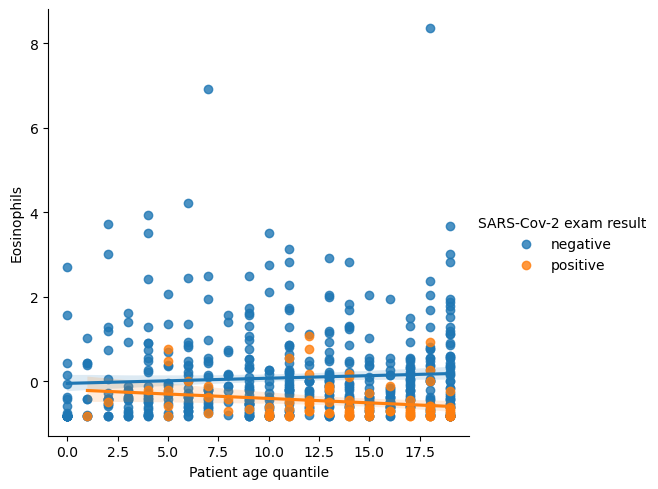

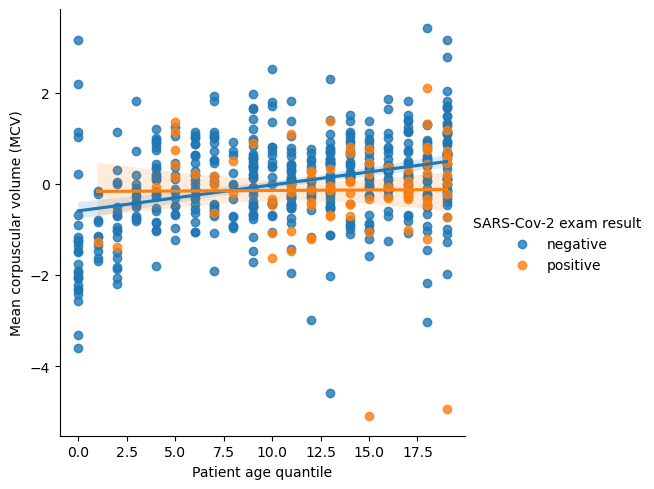

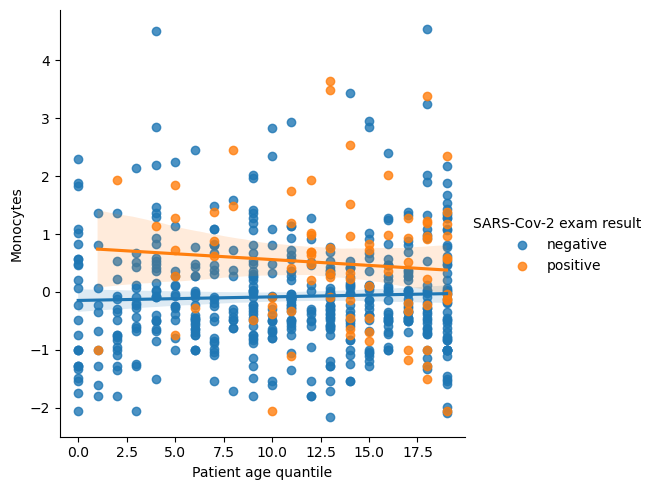

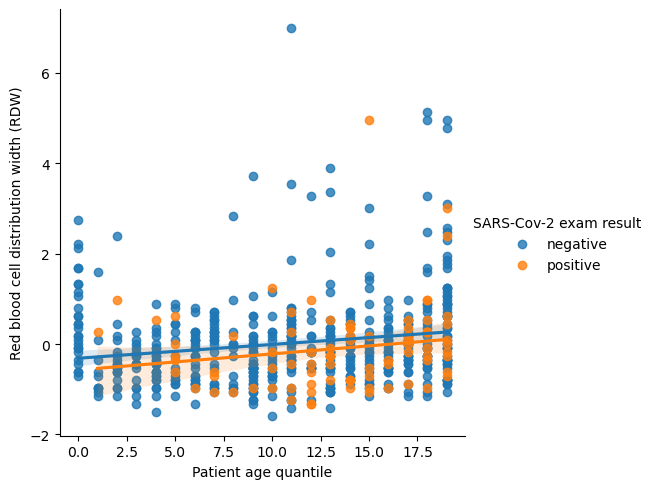

In [27]:
for col in blood_cols:
    sns.lmplot(x="Patient age quantile", y=col, hue="SARS-Cov-2 exam result",
               data=dataset)

In [28]:
dataset.corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

### Viral / Viral Relationship

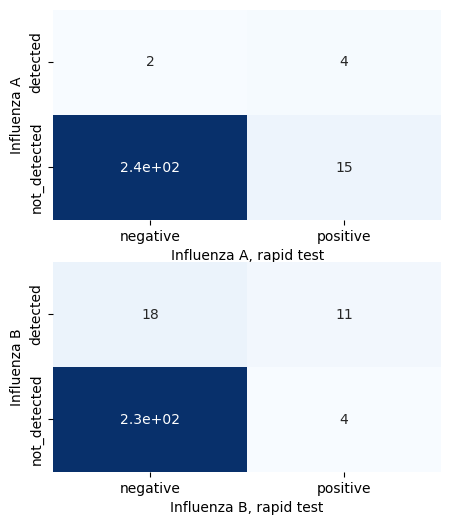

In [29]:
letters = ['A', 'B']
plt.figure(figsize=(5,6))
for i, letter in enumerate(letters):
    plt.subplot(2, 1, i + 1)
    sns.heatmap(
        pd.crosstab(dataset[f'Influenza {letter}'], dataset[f'Influenza {letter}, rapid test']),
        annot=True,
        cmap="Blues",
        cbar=False)
plt.show()

### Viral / Blood

#### Creation is_sick variable

In [30]:
dataset["is_sick"] = np.sum(dataset[viral_cols[:-2]] == 'detected', axis=1) >= 1

In [31]:
dataset.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",is_sick
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,True
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,True


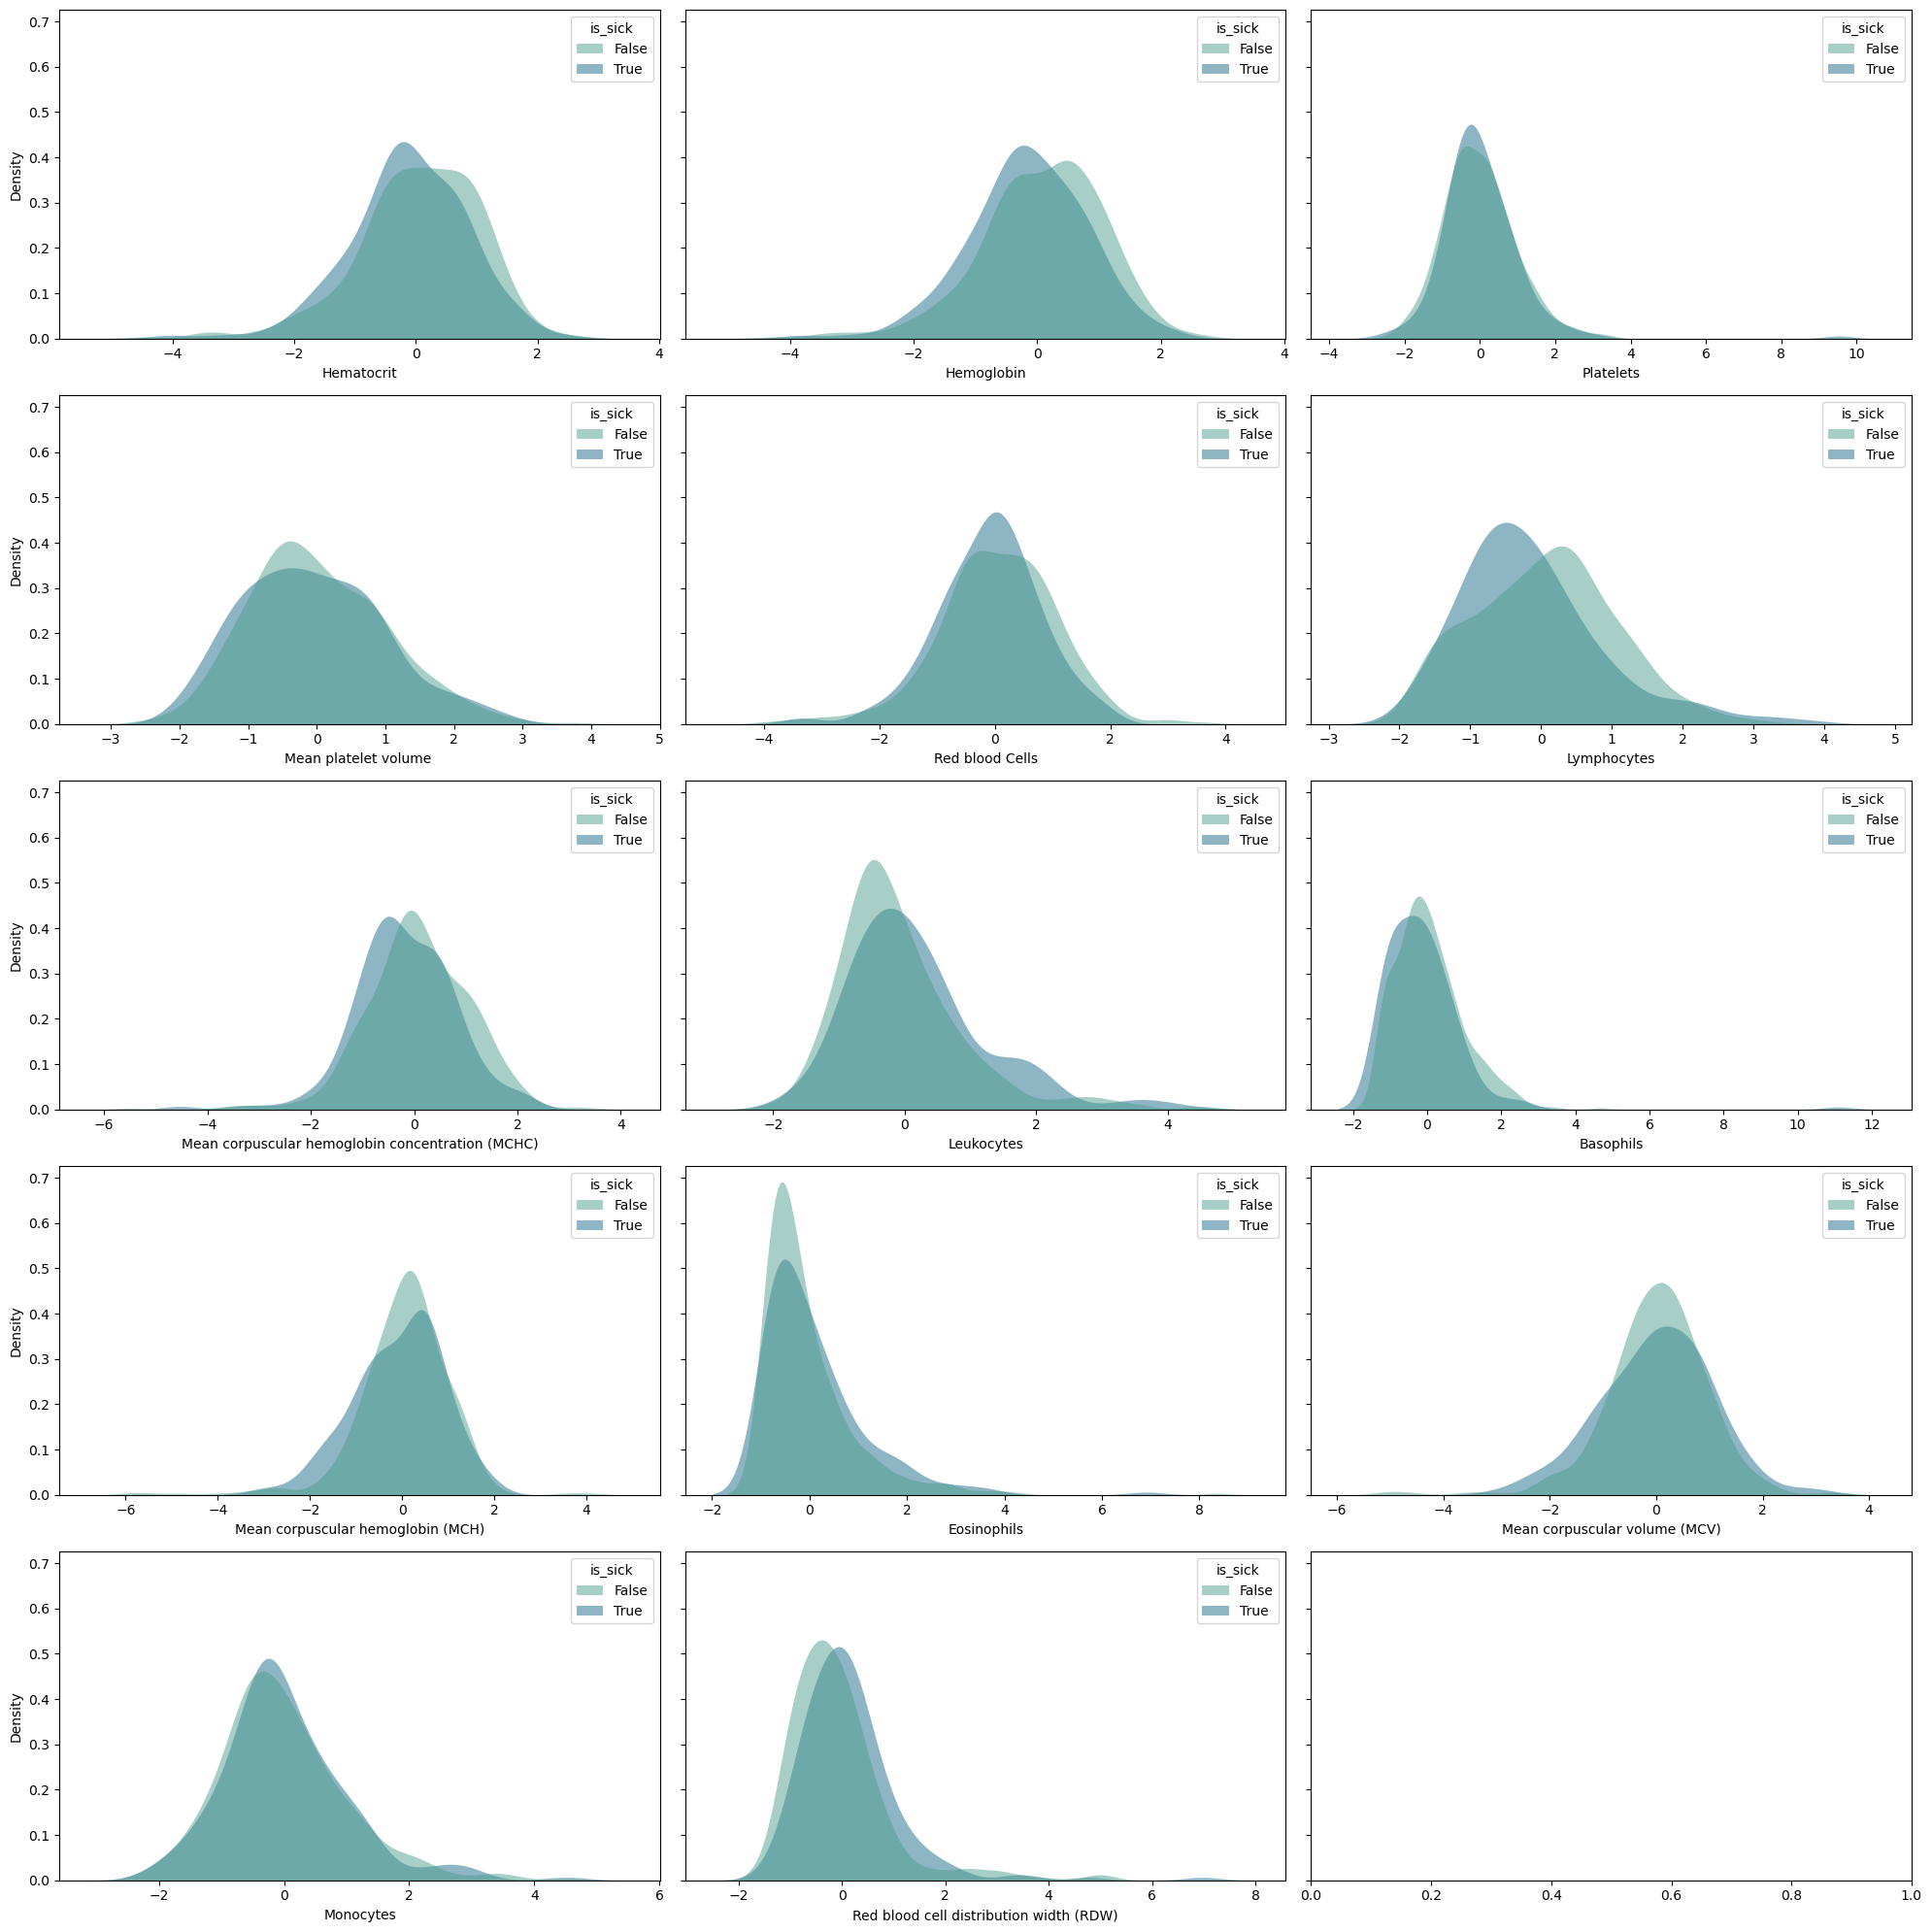

In [32]:
fig, axes = plt.subplots(5, 3, figsize=(20, 20), sharey=True)
i, j = 0, 0
for col in blood_cols:
    sns.kdeplot(
        ax=axes[i, j],
        data=dataset[['is_sick', col]],
        x=col,
        hue='is_sick',
        fill=True,
        common_norm=False,
        palette="crest",
        alpha=.5,
        linewidth=0
    )
    axes[i, j].set_xlabel(col)
    j += 1
    if j > 2:
        j = 0
        i += 1
fig.tight_layout()
plt.show()

In [33]:
def hospitalization(_df):
        if _df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
            return "ward"
        elif _df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
            return "semi-intensive"
        elif _df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
            return "intensive"
        else:
            return "unknown"

In [34]:
dataset['status'] = df.apply(hospitalization, axis=1)

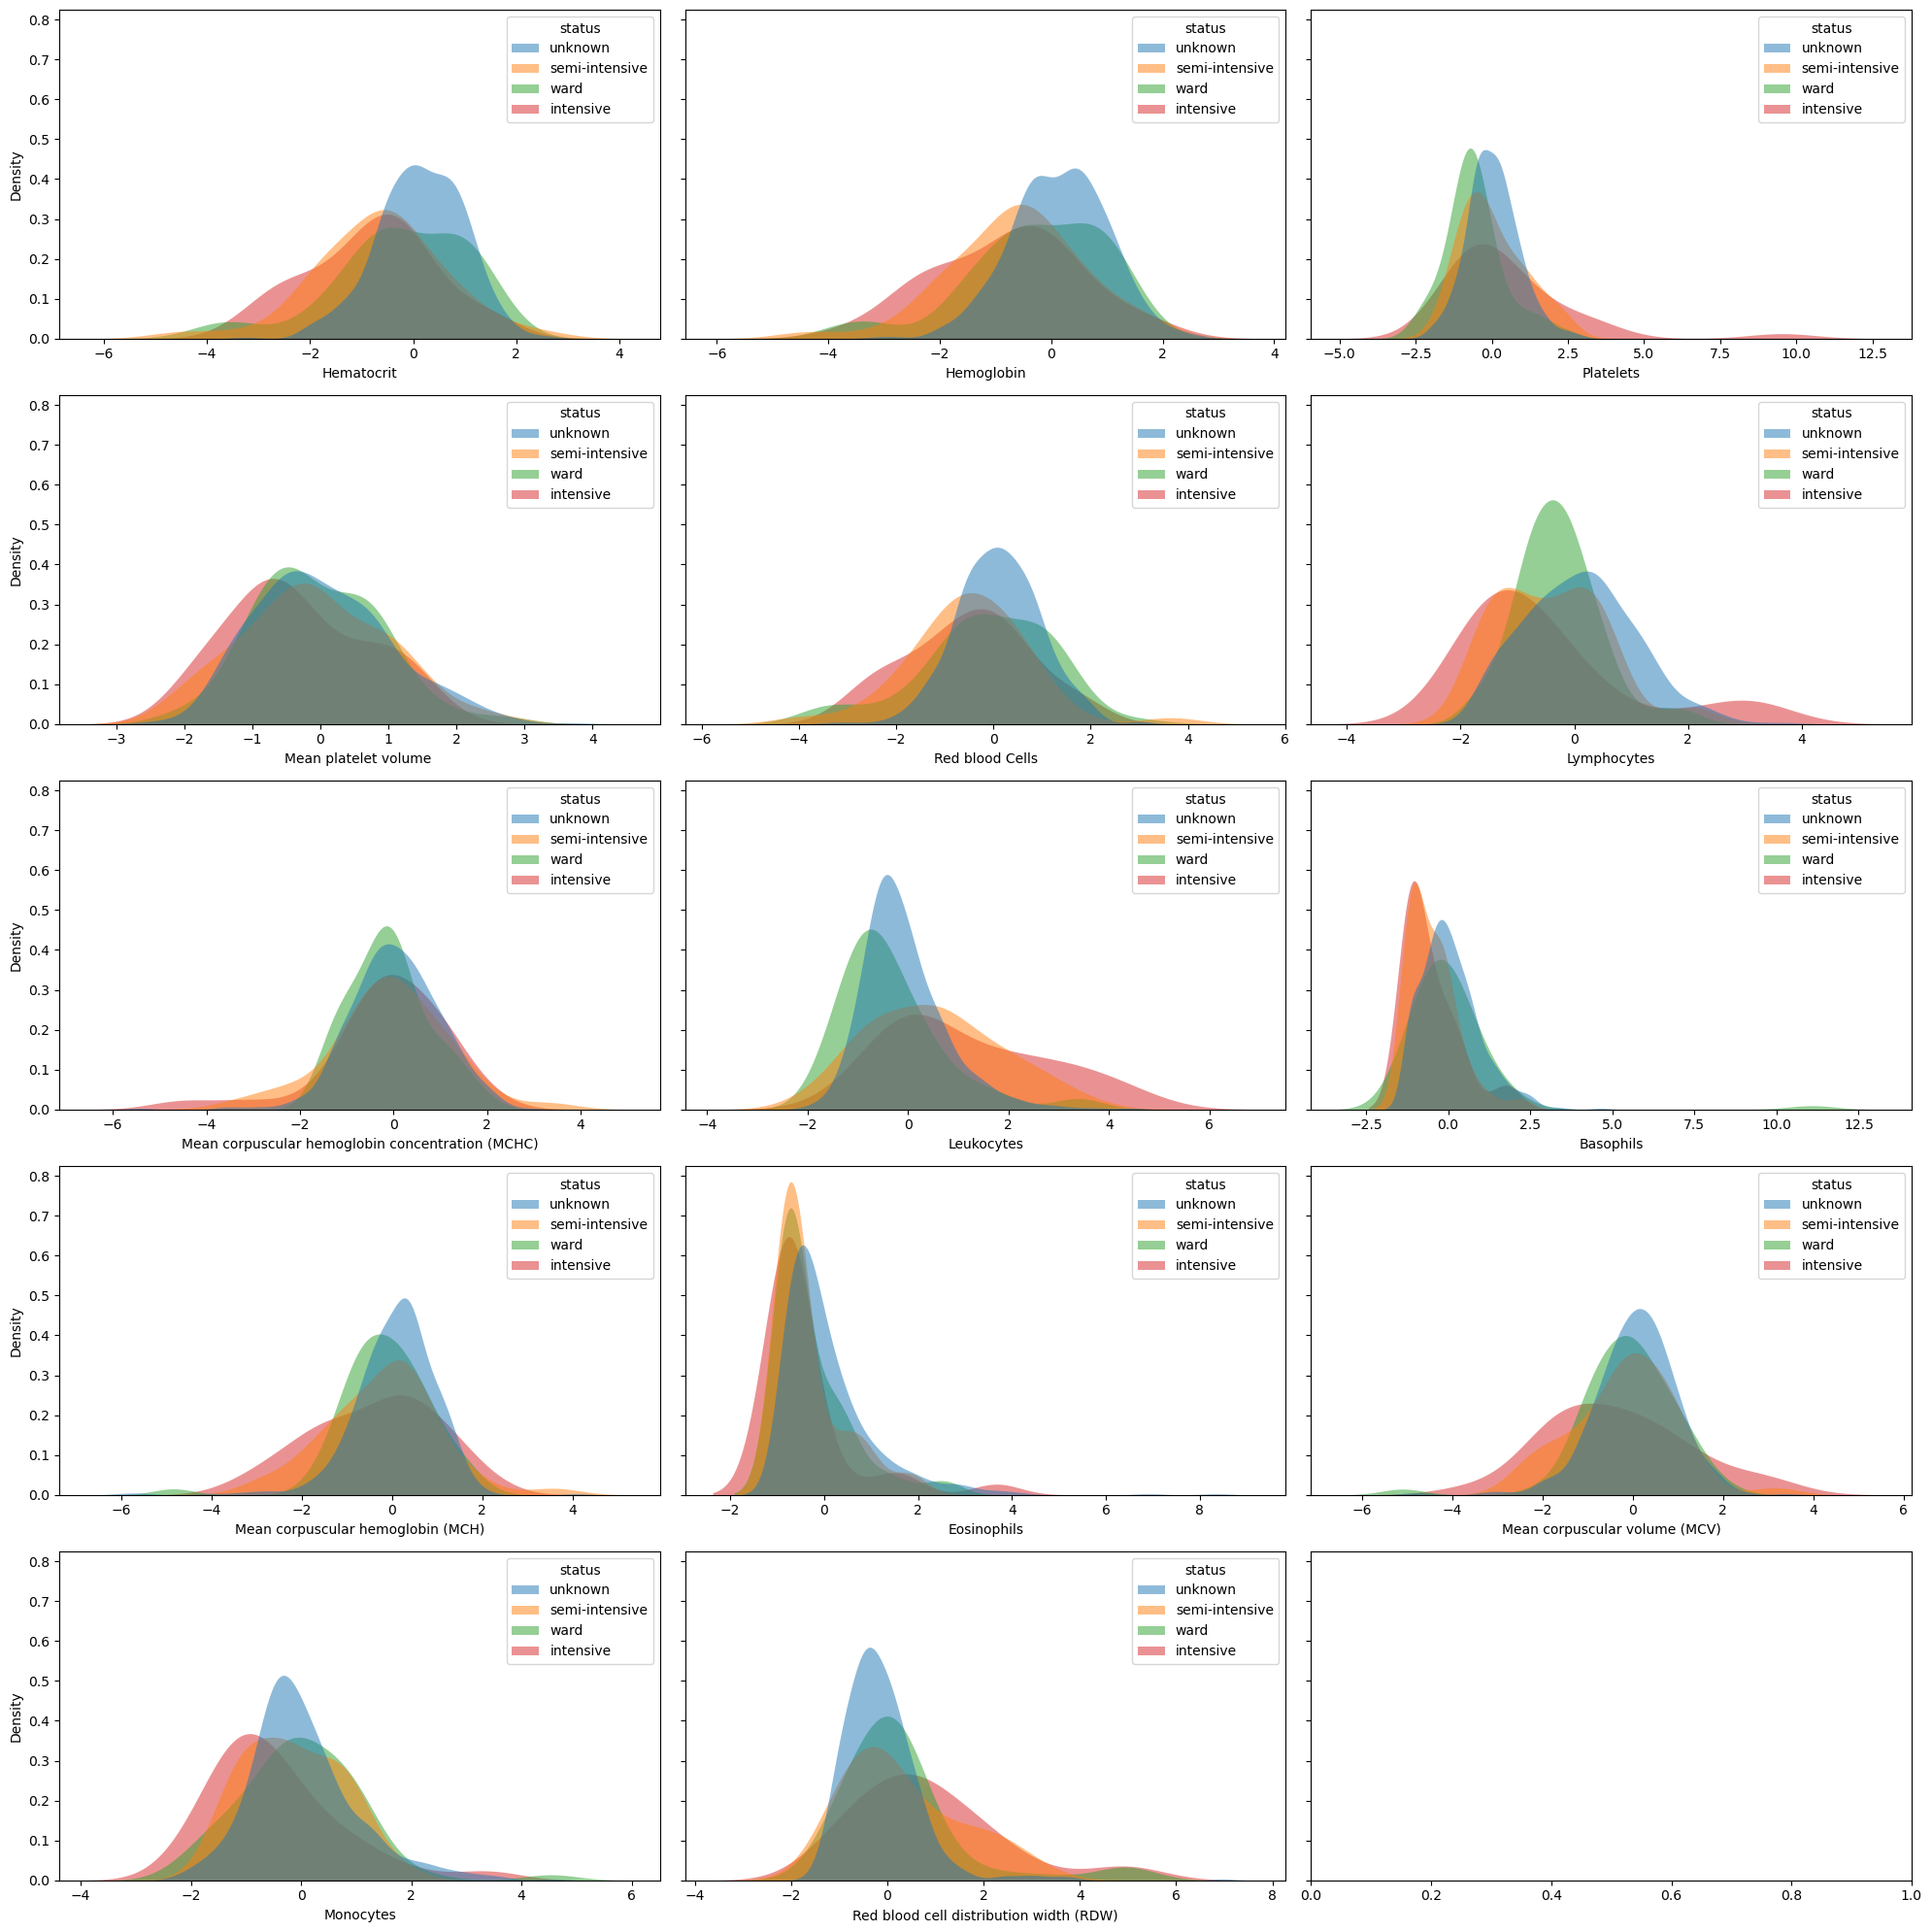

In [35]:
fig, axes = plt.subplots(5, 3, figsize=(20, 20), sharey=True)
i, j = 0, 0
for col in blood_cols:
    sns.kdeplot(
        ax=axes[i, j],
        data=dataset[['status', col]],
        x=col,
        hue='status',
        fill=True,
        common_norm=False,
        alpha=.5,
        linewidth=0
    )
    axes[i, j].set_xlabel(col)
    j += 1
    if j > 2:
        j = 0
        i += 1
fig.tight_layout()
plt.show()

In [36]:
dataset[blood_cols].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [37]:
dataset[viral_cols].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [38]:
df_1 = dataset[viral_cols[:-2]].copy()
df_1['cov'] = dataset['SARS-Cov-2 exam result']
df_1.dropna()['cov'].value_counts(normalize=True)

negative    0.91716
positive    0.08284
Name: cov, dtype: float64

In [39]:
df_2 = dataset[blood_cols].copy()
df_2['cov'] = dataset['SARS-Cov-2 exam result']
df_2.dropna()['cov'].value_counts(normalize=True)

negative    0.864548
positive    0.135452
Name: cov, dtype: float64

In [40]:
print(dataset.dropna(axis=0).shape)
dataset.dropna()['SARS-Cov-2 exam result'].value_counts(normalize=True)

(99, 40)


negative    0.868687
positive    0.131313
Name: SARS-Cov-2 exam result, dtype: float64

## T_Test

In [41]:
from scipy.stats import ttest_ind

In [42]:
print(positive_df.shape)
print(negative_df.shape)

(558, 38)
(5086, 38)


In [43]:
balanced_ned = negative_df.sample(positive_df.shape[0])

In [44]:
def t_test(col, alpha: int = 0.02):
    stat, p = ttest_ind(balanced_ned[col].dropna(), positive_df[col].dropna())
    if p < alpha:
        return "H0 REJECTED"
    return 0

In [45]:
for col in blood_cols:
    print(f"{col :-<50} {t_test(col)}")

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 REJECTED
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 REJECTED
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 REJECTED
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 REJECTED
Red blood cell distribution width (RDW)----------- 0
